City Characteristics  
This code is for CH4: Selected cities and features of their SUHI

In [132]:
#import the required libraries and the tables with the parameters

#import required packages
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import earthpy as et
import pandas as pd
import pickle
import matplotlib.patches as mpatches

#read in the city info table
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT'))
CITY_COUNTRY_lat_lon = pd.read_excel('CITY_COUNTRY_lat_lon.xlsx', index_col=None)

#drop the rows for the cities not looking at, reset index after dropping, drop old index
CITY_COUNTRY_lat_lon = CITY_COUNTRY_lat_lon.drop([9,11,18,22,23]).reset_index(drop = True)

#create dataframes to fill
seasons0 = CITY_COUNTRY_lat_lon.copy()
seasons0.drop(seasons0.columns.difference(['CITY_COUNTRY','City']), 1, inplace=True)
seasons = pd.concat([seasons0]*4, ignore_index =True)
#add the seasons column
seasons['Season'] = np.nan
#update to include seasons 
seasons.loc[0:(len(seasons0)-1), 'Season'] = 'DJF'
seasons.loc[(len(seasons0)):(len(seasons0)*2 - 1), 'Season'] = 'MAM'
seasons.loc[(len(seasons0)*2):(len(seasons0)*3 - 1), 'Season'] = 'JJA'
seasons.loc[(len(seasons0)*3):(len(seasons0)*4 - 1), 'Season'] = 'SON'
#add other columns to fill
seasons['a0'] = np.nan
seasons['a0_sd'] = np.nan
seasons['SUHI_mean'] = np.nan
seasons['SUHI_mean_sd'] = np.nan
seasons['footprint_area'] = np.nan
seasons['footprint_area_sd'] = np.nan

#create copies for 4 overpasses 
seasons_terra_day = seasons.copy()
seasons_terra_night = seasons.copy()
seasons_aqua_day = seasons.copy()
seasons_aqua_night = seasons.copy()


max_mins = CITY_COUNTRY_lat_lon.copy()
max_mins.drop(max_mins.columns.difference(['CITY_COUNTRY','City']), 1, inplace=True)
#add in the required columns to fill
max_mins['overall_a0'] = np.nan
max_mins['overall_a0_sd'] = np.nan
max_mins['overall_SUHI_mean'] = np.nan
max_mins['overall_SUHI_mean_sd'] = np.nan
max_mins['overall_footprint_area'] = np.nan
max_mins['overall_footprint_area_sd'] = np.nan
max_mins['peak_month'] = np.nan
max_mins['peak_month_a0'] = np.nan
max_mins['peak_month_a0_sd'] = np.nan
max_mins['peak_month_SUHI_mean'] = np.nan
max_mins['peak_month_SUHI_mean_sd'] = np.nan
max_mins['peak_month_footprint_area'] = np.nan
max_mins['peak_month_footprint_area_sd'] = np.nan
max_mins['low_month'] = np.nan
max_mins['low_month_a0'] = np.nan
max_mins['low_month_a0_sd'] = np.nan
max_mins['low_month_SUHI_mean'] = np.nan
max_mins['low_month_SUHI_mean_sd'] = np.nan
max_mins['low_month_footprint_area'] = np.nan
max_mins['low_month_footprint_area_sd'] = np.nan

#create copies for 4 overpasses 

max_mins_terra_day = max_mins.copy()
max_mins_terra_night = max_mins.copy()
max_mins_aqua_day = max_mins.copy()
max_mins_aqua_night = max_mins.copy()

In [138]:

#loop through cities and add the required info to the 2 tables
for i in range(len(CITY_COUNTRY_lat_lon)):
    CITY_COUNTRY = CITY_COUNTRY_lat_lon['CITY_COUNTRY'][i] 

    #read in parameters table
    SATELLITE = 'MOD11A2' #TERRA
    os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))

    pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
    with open(pickle_name, 'rb') as f:
        terra_parameters_day = pickle.load(f)
    pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
    with open(pickle_name, 'rb') as f:
        terra_parameters_night = pickle.load(f)

    SATELLITE = 'MYD11A2' #AQUA
    os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
    
    pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
    with open(pickle_name, 'rb') as f:
        aqua_parameters_day = pickle.load(f)
    pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
    with open(pickle_name, 'rb') as f:
        aqua_parameters_night = pickle.load(f)


###################################################
################ The Seasons Table ################
###################################################
    #add in the seasons 
    #terra day 10:30
    
    # create a list of the values we want to assign for each condition- the values of the seasons

    values = ['DJF', 'MAM', 'JJA', 'SON']

    # create a list of our conditions for each season
    conditions = [
        ((terra_parameters_day['Month'] == 12)|(terra_parameters_day['Month'] == 1)|(terra_parameters_day['Month'] == 2)),
        ((terra_parameters_day['Month'] == 3)|(terra_parameters_day['Month'] == 4)|(terra_parameters_day['Month'] == 5)),
        ((terra_parameters_day['Month'] == 6)|(terra_parameters_day['Month'] == 7)|(terra_parameters_day['Month'] == 8)),
        ((terra_parameters_day['Month'] == 9)|(terra_parameters_day['Month'] == 10)|(terra_parameters_day['Month'] == 11))
        ]

    # create a new column and use np.select to assign values to it using our lists as arguments
    terra_parameters_day['season'] = np.select(conditions, values)

    #terra night 22:30
    # create a list of new conditions for each season
    conditions = [
        ((terra_parameters_night['Month'] == 12)|(terra_parameters_night['Month'] == 1)|(terra_parameters_night['Month'] == 2)),
        ((terra_parameters_night['Month'] == 3)|(terra_parameters_night['Month'] == 4)|(terra_parameters_night['Month'] == 5)),
        ((terra_parameters_night['Month'] == 6)|(terra_parameters_night['Month'] == 7)|(terra_parameters_night['Month'] == 8)),
        ((terra_parameters_night['Month'] == 9)|(terra_parameters_night['Month'] == 10)|(terra_parameters_night['Month'] == 11))
        ]

    # create a new column and use np.select to assign values to it using our lists as arguments
    terra_parameters_night['season'] = np.select(conditions, values)

    #aqua day 13:30
    # create a list of new conditions for each season
    conditions = [
        ((aqua_parameters_day['Month'] == 12)|(aqua_parameters_day['Month'] == 1)|(aqua_parameters_day['Month'] == 2)),
        ((aqua_parameters_day['Month'] == 3)|(aqua_parameters_day['Month'] == 4)|(aqua_parameters_day['Month'] == 5)),
        ((aqua_parameters_day['Month'] == 6)|(aqua_parameters_day['Month'] == 7)|(aqua_parameters_day['Month'] == 8)),
        ((aqua_parameters_day['Month'] == 9)|(aqua_parameters_day['Month'] == 10)|(aqua_parameters_day['Month'] == 11))
        ]

    # create a new column and use np.select to assign values to it using our lists as arguments
    aqua_parameters_day['season'] = np.select(conditions, values)

    #aqua night 01:30
    # create a list of new conditions for each season
    conditions = [
        ((aqua_parameters_night['Month'] == 12)|(aqua_parameters_night['Month'] == 1)|(aqua_parameters_night['Month'] == 2)),
        ((aqua_parameters_night['Month'] == 3)|(aqua_parameters_night['Month'] == 4)|(aqua_parameters_night['Month'] == 5)),
        ((aqua_parameters_night['Month'] == 6)|(aqua_parameters_night['Month'] == 7)|(aqua_parameters_night['Month'] == 8)),
        ((aqua_parameters_night['Month'] == 9)|(aqua_parameters_night['Month'] == 10)|(aqua_parameters_night['Month'] == 11))
        ]

    # create a new column and use np.select to assign values to it using our lists as arguments
    aqua_parameters_night['season'] = np.select(conditions, values)


    #average based on season and add to the table 
    #for terra day, 10:30
    #a0
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'DJF'), 'a0'] \
    = terra_parameters_day.groupby(['season']).mean()['day_a0'].DJF

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'MAM'), 'a0'] \
    = terra_parameters_day.groupby(['season']).mean()['day_a0'].MAM

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'JJA'), 'a0'] \
    = terra_parameters_day.groupby(['season']).mean()['day_a0'].JJA

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'SON'), 'a0'] \
    = terra_parameters_day.groupby(['season']).mean()['day_a0'].SON

    #standard deviation
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'DJF'), 'a0_sd'] \
    = terra_parameters_day.groupby(['season']).std()['day_a0'].DJF

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'MAM'), 'a0_sd'] \
    = terra_parameters_day.groupby(['season']).std()['day_a0'].MAM

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'JJA'), 'a0_sd'] \
    = terra_parameters_day.groupby(['season']).std()['day_a0'].JJA

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'SON'), 'a0_sd'] \
    = terra_parameters_day.groupby(['season']).std()['day_a0'].SON

    #average based on season
    #mean SUHI - method_2_SUHI
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'DJF'), 
                          'SUHI_mean'] = terra_parameters_day.groupby(['season']).mean()['method_2_SUHI'].DJF

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'MAM'), 
                          'SUHI_mean'] = terra_parameters_day.groupby(['season']).mean()['method_2_SUHI'].MAM

    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'JJA'), 
                          'SUHI_mean'] = terra_parameters_day.groupby(['season']).mean()['method_2_SUHI'].JJA
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'SON'), 
                          'SUHI_mean'] = terra_parameters_day.groupby(['season']).mean()['method_2_SUHI'].SON
    
    #standard deviation
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'DJF'), 
                          'SUHI_mean_sd'] = terra_parameters_day.groupby(['season']).std()['method_2_SUHI'].DJF
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'MAM'), 
                          'SUHI_mean_sd'] = terra_parameters_day.groupby(['season']).std()['method_2_SUHI'].MAM
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'JJA'), 
                          'SUHI_mean_sd'] = terra_parameters_day.groupby(['season']).std()['method_2_SUHI'].JJA
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'SON'), 
                          'SUHI_mean_sd'] = terra_parameters_day.groupby(['season']).std()['method_2_SUHI'].SON

    #average based on season
    #footprint area
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'DJF'), 
                          'footprint_area'] = terra_parameters_day.groupby(['season']).mean()['footprint_area'].DJF
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'MAM'), 
                          'footprint_area'] = terra_parameters_day.groupby(['season']).mean()['footprint_area'].MAM
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'JJA'), 
                          'footprint_area'] = terra_parameters_day.groupby(['season']).mean()['footprint_area'].JJA
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'SON'), 
                          'footprint_area'] = terra_parameters_day.groupby(['season']).mean()['footprint_area'].SON
    
    #standard deviation
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'DJF'), 
                          'footprint_area_sd'] = terra_parameters_day.groupby(['season']).std()['footprint_area'].DJF
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'MAM'), 
                          'footprint_area_sd'] = terra_parameters_day.groupby(['season']).std()['footprint_area'].MAM
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'JJA'), 
                          'footprint_area_sd'] = terra_parameters_day.groupby(['season']).std()['footprint_area'].JJA
    
    seasons_terra_day.loc[(seasons_terra_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_day['Season'] == 'SON'), 
                          'footprint_area_sd'] = terra_parameters_day.groupby(['season']).std()['footprint_area'].SON

    
    #for terra night, 22:30
    #a0
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'DJF'), 'a0'] \
    = terra_parameters_night.groupby(['season']).mean()['night_a0'].DJF
    
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'MAM'), 'a0'] \
    = terra_parameters_night.groupby(['season']).mean()['night_a0'].MAM

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'JJA'), 'a0'] \
    = terra_parameters_night.groupby(['season']).mean()['night_a0'].JJA
    
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'SON'), 'a0'] \
    = terra_parameters_night.groupby(['season']).mean()['night_a0'].SON

    #standard deviation
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'DJF'), 'a0_sd'] \
    = terra_parameters_night.groupby(['season']).std()['night_a0'].DJF

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'MAM'), 'a0_sd'] \
    = terra_parameters_night.groupby(['season']).std()['night_a0'].MAM

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'JJA'), 'a0_sd'] \
    = terra_parameters_night.groupby(['season']).std()['night_a0'].JJA
    
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'SON'), 'a0_sd'] \
    = terra_parameters_night.groupby(['season']).std()['night_a0'].SON

    #average based on season
    #mean SUHI - method_2_SUHI
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'DJF'), 
                          'SUHI_mean'] = terra_parameters_night.groupby(['season']).mean()['method_2_SUHI'].DJF
    
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'MAM'), 
                          'SUHI_mean'] = terra_parameters_night.groupby(['season']).mean()['method_2_SUHI'].MAM
    
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'JJA'), 
                          'SUHI_mean'] = terra_parameters_night.groupby(['season']).mean()['method_2_SUHI'].JJA

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'SON'), 
                          'SUHI_mean'] = terra_parameters_night.groupby(['season']).mean()['method_2_SUHI'].SON

    #standard deviation
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'DJF'), 
                          'SUHI_mean_sd'] = terra_parameters_night.groupby(['season']).std()['method_2_SUHI'].DJF

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'MAM'), 
                      'SUHI_mean_sd'] = terra_parameters_night.groupby(['season']).std()['method_2_SUHI'].MAM

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'JJA'), 
                          'SUHI_mean_sd'] = terra_parameters_night.groupby(['season']).std()['method_2_SUHI'].JJA

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'SON'), 
                          'SUHI_mean_sd'] = terra_parameters_night.groupby(['season']).std()['method_2_SUHI'].SON

    #average based on season
    #footprint area
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'DJF'), 
                          'footprint_area'] = terra_parameters_night.groupby(['season']).mean()['footprint_area'].DJF

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'MAM'), 
                          'footprint_area'] = terra_parameters_night.groupby(['season']).mean()['footprint_area'].MAM

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'JJA'), 
                          'footprint_area'] = terra_parameters_night.groupby(['season']).mean()['footprint_area'].JJA

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'SON'), 
                          'footprint_area'] = terra_parameters_night.groupby(['season']).mean()['footprint_area'].SON

    #standard deviation
    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'DJF'), 
                          'footprint_area_sd'] = terra_parameters_night.groupby(['season']).std()['footprint_area'].DJF

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'MAM'), 
                          'footprint_area_sd'] = terra_parameters_night.groupby(['season']).std()['footprint_area'].MAM

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'JJA'), 
                          'footprint_area_sd'] = terra_parameters_night.groupby(['season']).std()['footprint_area'].JJA

    seasons_terra_night.loc[(seasons_terra_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_terra_night['Season'] == 'SON'), 
                          'footprint_area_sd'] = terra_parameters_night.groupby(['season']).std()['footprint_area'].SON

    #for aqua day, 13:30
    #a0
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'DJF'), 'a0'] \
    = aqua_parameters_day.groupby(['season']).mean()['day_a0'].DJF

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'MAM'), 'a0'] \
    = aqua_parameters_day.groupby(['season']).mean()['day_a0'].MAM

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'JJA'), 'a0'] \
    = aqua_parameters_day.groupby(['season']).mean()['day_a0'].JJA

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'SON'), 'a0'] \
    = aqua_parameters_day.groupby(['season']).mean()['day_a0'].SON

    #standard deviation
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'DJF'), 'a0_sd'] \
    = aqua_parameters_day.groupby(['season']).std()['day_a0'].DJF

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'MAM'), 'a0_sd'] \
    = aqua_parameters_day.groupby(['season']).std()['day_a0'].MAM

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'JJA'), 'a0_sd'] \
    = aqua_parameters_day.groupby(['season']).std()['day_a0'].JJA

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'SON'), 'a0_sd'] \
    = aqua_parameters_day.groupby(['season']).std()['day_a0'].SON

    #average based on season
    #mean SUHI - method_2_SUHI
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'DJF'), 
                          'SUHI_mean'] = aqua_parameters_day.groupby(['season']).mean()['method_2_SUHI'].DJF
    
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'MAM'), 
                          'SUHI_mean'] = aqua_parameters_day.groupby(['season']).mean()['method_2_SUHI'].MAM
    
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'JJA'), 
                          'SUHI_mean'] = aqua_parameters_day.groupby(['season']).mean()['method_2_SUHI'].JJA

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'SON'), 
                          'SUHI_mean'] = aqua_parameters_day.groupby(['season']).mean()['method_2_SUHI'].SON

    #standard deviation
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'DJF'), 
                          'SUHI_mean_sd'] = aqua_parameters_day.groupby(['season']).std()['method_2_SUHI'].DJF

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'MAM'), 
                          'SUHI_mean_sd'] = aqua_parameters_day.groupby(['season']).std()['method_2_SUHI'].MAM

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'JJA'), 
                          'SUHI_mean_sd'] = aqua_parameters_day.groupby(['season']).std()['method_2_SUHI'].JJA

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'SON'), 
                          'SUHI_mean_sd'] = aqua_parameters_day.groupby(['season']).std()['method_2_SUHI'].SON

    #average based on season
    #footprint area
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'DJF'), 
                          'footprint_area'] = aqua_parameters_day.groupby(['season']).mean()['footprint_area'].DJF

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'MAM'), 
                          'footprint_area'] = aqua_parameters_day.groupby(['season']).mean()['footprint_area'].MAM

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'JJA'), 
                          'footprint_area'] = aqua_parameters_day.groupby(['season']).mean()['footprint_area'].JJA

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'SON'), 
                          'footprint_area'] = aqua_parameters_day.groupby(['season']).mean()['footprint_area'].SON

    #standard deviation
    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'DJF'), 
                          'footprint_area_sd'] = aqua_parameters_day.groupby(['season']).std()['footprint_area'].DJF

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'MAM'), 
                          'footprint_area_sd'] = aqua_parameters_day.groupby(['season']).std()['footprint_area'].MAM

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'JJA'), 
                          'footprint_area_sd'] = aqua_parameters_day.groupby(['season']).std()['footprint_area'].JJA

    seasons_aqua_day.loc[(seasons_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_day['Season'] == 'SON'), 
                          'footprint_area_sd'] = aqua_parameters_day.groupby(['season']).std()['footprint_area'].SON


    #for aqua night, 01:30
    #a0
    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'DJF'), 'a0'] \
    = aqua_parameters_night.groupby(['season']).mean()['night_a0'].DJF

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'MAM'), 'a0'] \
    = aqua_parameters_night.groupby(['season']).mean()['night_a0'].MAM

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'JJA'), 'a0'] \
    = aqua_parameters_night.groupby(['season']).mean()['night_a0'].JJA

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'SON'), 'a0'] \
    = aqua_parameters_night.groupby(['season']).mean()['night_a0'].SON

    #standard deviation
    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'DJF'), 'a0_sd'] \
    = aqua_parameters_night.groupby(['season']).std()['night_a0'].DJF

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'MAM'), 'a0_sd'] \
    = aqua_parameters_night.groupby(['season']).std()['night_a0'].MAM

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'JJA'), 'a0_sd'] \
    = aqua_parameters_night.groupby(['season']).std()['night_a0'].JJA

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'SON'), 'a0_sd'] \
    = aqua_parameters_night.groupby(['season']).std()['night_a0'].SON

    #average based on season
    #mean SUHI - method_2_SUHI
    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'DJF'), 
                          'SUHI_mean'] = aqua_parameters_night.groupby(['season']).mean()['method_2_SUHI'].DJF

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'MAM'), 
                          'SUHI_mean'] = aqua_parameters_night.groupby(['season']).mean()['method_2_SUHI'].MAM

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'JJA'), 
                          'SUHI_mean'] = aqua_parameters_night.groupby(['season']).mean()['method_2_SUHI'].JJA

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'SON'), 
                          'SUHI_mean'] = aqua_parameters_night.groupby(['season']).mean()['method_2_SUHI'].SON

    #standard deviation
    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'DJF'), 
                      'SUHI_mean_sd'] = aqua_parameters_night.groupby(['season']).std()['method_2_SUHI'].DJF

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'MAM'), 
                          'SUHI_mean_sd'] = aqua_parameters_night.groupby(['season']).std()['method_2_SUHI'].MAM

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'JJA'), 
                          'SUHI_mean_sd'] = aqua_parameters_night.groupby(['season']).std()['method_2_SUHI'].JJA

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'SON'), 
                          'SUHI_mean_sd'] = aqua_parameters_night.groupby(['season']).std()['method_2_SUHI'].SON
    
    #average based on season
    #footprint area
    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'DJF'), 
                          'footprint_area'] = aqua_parameters_night.groupby(['season']).mean()['footprint_area'].DJF

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'MAM'), 
                          'footprint_area'] = aqua_parameters_night.groupby(['season']).mean()['footprint_area'].MAM

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'JJA'), 
                          'footprint_area'] = aqua_parameters_night.groupby(['season']).mean()['footprint_area'].JJA

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'SON'), 
                          'footprint_area'] = aqua_parameters_night.groupby(['season']).mean()['footprint_area'].SON

    #standard deviation
    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'DJF'), 
                          'footprint_area_sd'] = aqua_parameters_night.groupby(['season']).std()['footprint_area'].DJF

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'MAM'), 
                          'footprint_area_sd'] = aqua_parameters_night.groupby(['season']).std()['footprint_area'].MAM

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'JJA'), 
                          'footprint_area_sd'] = aqua_parameters_night.groupby(['season']).std()['footprint_area'].JJA

    seasons_aqua_night.loc[(seasons_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY) & (seasons_aqua_night['Season'] == 'SON'), 
                          'footprint_area_sd'] = aqua_parameters_night.groupby(['season']).std()['footprint_area'].SON

###################################################
############## The Min and Max Table ##############
###################################################

    #terra day 10:30
    # calculate and add overall means/ std and add to dataframe
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0'] = terra_parameters_day.day_a0.mean()
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0_sd']= terra_parameters_day.day_a0.std()
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean'] = terra_parameters_day.method_2_SUHI.mean()
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean_sd']  = terra_parameters_day.method_2_SUHI.std()
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area']= terra_parameters_day.footprint_area.mean()
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area_sd']= terra_parameters_day.footprint_area.std()

    #calculate the min and max a0 and the month it occurs in
    values = terra_parameters_day.groupby(['Month']).mean()['day_a0'].values
    max_mon = max(range(len(values)), key=values.__getitem__)+1 #get the index of the max value then +1 to get month (mths start at 1)
    min_mon = min(range(len(values)), key=values.__getitem__)+1 #get the index of the min value then +1 to get month (mths start at 1)
    max_mon_val = terra_parameters_day.groupby(['Month']).mean()['day_a0'][max_mon]
    min_mon_val = terra_parameters_day.groupby(['Month']).mean()['day_a0'][min_mon]

    #add the values to dataframe
    #peak month
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month'] = max_mon

    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0'] = terra_parameters_day.groupby(['Month']).mean()['day_a0'][max_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0_sd']= terra_parameters_day.groupby(['Month']).std()['day_a0'][max_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean'] = terra_parameters_day.groupby(['Month']).mean()['method_2_SUHI'][max_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean_sd']  = terra_parameters_day.groupby(['Month']).std()['method_2_SUHI'][max_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_footprint_area']= terra_parameters_day.groupby(['Month']).mean()['footprint_area'][max_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY),'peak_month_footprint_area_sd']\
    = terra_parameters_day.groupby(['Month']).std()['footprint_area'][max_mon]


    #low month
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month'] = min_mon

    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0'] = terra_parameters_day.groupby(['Month']).mean()['day_a0'][min_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0_sd']= terra_parameters_day.groupby(['Month']).std()['day_a0'][min_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean'] = terra_parameters_day.groupby(['Month']).mean()['method_2_SUHI'][min_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean_sd']  = terra_parameters_day.groupby(['Month']).std()['method_2_SUHI'][min_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area']= terra_parameters_day.groupby(['Month']).mean()['footprint_area'][min_mon]
    
    max_mins_terra_day.loc[(max_mins_terra_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area_sd']= terra_parameters_day.groupby(['Month']).std()['footprint_area'][min_mon]

    #terra night 22:30
    # calculate and add overall means/ std and add to dataframe
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0'] = terra_parameters_night.night_a0.mean()
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0_sd']= terra_parameters_night.night_a0.std()
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean'] = terra_parameters_night.method_2_SUHI.mean()
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean_sd']  = terra_parameters_night.method_2_SUHI.std()
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area']= terra_parameters_night.footprint_area.mean()
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area_sd']= terra_parameters_night.footprint_area.std()

    #calculate the min and max a0 and the month it occurs in
    values = terra_parameters_night.groupby(['Month']).mean()['night_a0'].values
    max_mon = max(range(len(values)), key=values.__getitem__)+1 #get the index of the max value then +1 to get month (mths start at 1)
    min_mon = min(range(len(values)), key=values.__getitem__)+1 #get the index of the min value then +1 to get month (mths start at 1)
    max_mon_val = terra_parameters_night.groupby(['Month']).mean()['night_a0'][max_mon]
    min_mon_val = terra_parameters_night.groupby(['Month']).mean()['night_a0'][min_mon]

    #add the values to dataframe
    #peak month
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month'] = max_mon

    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0'] = terra_parameters_night.groupby(['Month']).mean()['night_a0'][max_mon]

    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0_sd']= terra_parameters_night.groupby(['Month']).std()['night_a0'][max_mon]

    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean'] = terra_parameters_night.groupby(['Month']).mean()['method_2_SUHI'][max_mon]

    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean_sd']  = terra_parameters_night.groupby(['Month']).std()['method_2_SUHI'][max_mon]

    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_footprint_area']= terra_parameters_night.groupby(['Month']).mean()['footprint_area'][max_mon]

    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY),'peak_month_footprint_area_sd']\
    = terra_parameters_night.groupby(['Month']).std()['footprint_area'][max_mon]


    #low month
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month'] = min_mon

    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0'] = terra_parameters_night.groupby(['Month']).mean()['night_a0'][min_mon]
    
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0_sd']= terra_parameters_night.groupby(['Month']).std()['night_a0'][min_mon]
    
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean'] = terra_parameters_night.groupby(['Month']).mean()['method_2_SUHI'][min_mon]
    
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean_sd']  = terra_parameters_night.groupby(['Month']).std()['method_2_SUHI'][min_mon]
    
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area']= terra_parameters_night.groupby(['Month']).mean()['footprint_area'][min_mon]
    
    max_mins_terra_night.loc[(max_mins_terra_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area_sd']= terra_parameters_night.groupby(['Month']).std()['footprint_area'][min_mon]
    
    #aqua day 13:30
    # calculate and add overall means/ std and add to dataframe
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0'] = aqua_parameters_day.day_a0.mean()
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0_sd']= aqua_parameters_day.day_a0.std()
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean'] = aqua_parameters_day.method_2_SUHI.mean()
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean_sd']  = aqua_parameters_day.method_2_SUHI.std()
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area']= aqua_parameters_day.footprint_area.mean()
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area_sd']= aqua_parameters_day.footprint_area.std()
    
    #calculate the min and max a0 and the month it occurs in
    values = aqua_parameters_day.groupby(['Month']).mean()['day_a0'].values
    max_mon = max(range(len(values)), key=values.__getitem__)+1 #get the index of the max value then +1 to get month (mths start at 1)
    min_mon = min(range(len(values)), key=values.__getitem__)+1 #get the index of the min value then +1 to get month (mths start at 1)
    max_mon_val = aqua_parameters_day.groupby(['Month']).mean()['day_a0'][max_mon]
    min_mon_val = aqua_parameters_day.groupby(['Month']).mean()['day_a0'][min_mon]

    #add the values to dataframe
    #peak month
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month'] = max_mon
    
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0'] = aqua_parameters_day.groupby(['Month']).mean()['day_a0'][max_mon]
    
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0_sd']= aqua_parameters_day.groupby(['Month']).std()['day_a0'][max_mon]
    
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean'] = aqua_parameters_day.groupby(['Month']).mean()['method_2_SUHI'][max_mon]
    
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean_sd']  = aqua_parameters_day.groupby(['Month']).std()['method_2_SUHI'][max_mon]
    
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_footprint_area']= aqua_parameters_day.groupby(['Month']).mean()['footprint_area'][max_mon]

    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY),'peak_month_footprint_area_sd']\
    = aqua_parameters_day.groupby(['Month']).std()['footprint_area'][max_mon]
    
    
    #low month
    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month'] = min_mon

    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0'] = aqua_parameters_day.groupby(['Month']).mean()['day_a0'][min_mon]

    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0_sd']= aqua_parameters_day.groupby(['Month']).std()['day_a0'][min_mon]

    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean'] = aqua_parameters_day.groupby(['Month']).mean()['method_2_SUHI'][min_mon]

    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean_sd']  = aqua_parameters_day.groupby(['Month']).std()['method_2_SUHI'][min_mon]

    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area']= aqua_parameters_day.groupby(['Month']).mean()['footprint_area'][min_mon]

    max_mins_aqua_day.loc[(max_mins_aqua_day['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area_sd']= aqua_parameters_day.groupby(['Month']).std()['footprint_area'][min_mon]

    #aqua night 01:30
    # calculate and add overall means/ std and add to dataframe
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0'] = aqua_parameters_night.night_a0.mean()
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY),'overall_a0_sd']= aqua_parameters_night.night_a0.std()
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean'] = aqua_parameters_night.method_2_SUHI.mean()
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_SUHI_mean_sd']  = aqua_parameters_night.method_2_SUHI.std()
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area']= aqua_parameters_night.footprint_area.mean()
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'overall_footprint_area_sd']= aqua_parameters_night.footprint_area.std()

    #calculate the min and max a0 and the month it occurs in
    values = aqua_parameters_night.groupby(['Month']).mean()['night_a0'].values
    max_mon = max(range(len(values)), key=values.__getitem__)+1 #get the index of the max value then +1 to get month (mths start at 1)
    min_mon = min(range(len(values)), key=values.__getitem__)+1 #get the index of the min value then +1 to get month (mths start at 1)
    max_mon_val = aqua_parameters_night.groupby(['Month']).mean()['night_a0'][max_mon]
    min_mon_val = aqua_parameters_night.groupby(['Month']).mean()['night_a0'][min_mon]
    
    #add the values to dataframe
    #peak month
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month'] = max_mon

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0'] = aqua_parameters_night.groupby(['Month']).mean()['night_a0'][max_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_a0_sd']= aqua_parameters_night.groupby(['Month']).std()['night_a0'][max_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean'] = aqua_parameters_night.groupby(['Month']).mean()['method_2_SUHI'][max_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_SUHI_mean_sd']  = aqua_parameters_night.groupby(['Month']).std()['method_2_SUHI'][max_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'peak_month_footprint_area']= aqua_parameters_night.groupby(['Month']).mean()['footprint_area'][max_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY),'peak_month_footprint_area_sd']\
    = aqua_parameters_night.groupby(['Month']).std()['footprint_area'][max_mon]


    #low month
    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month'] = min_mon

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0'] = aqua_parameters_night.groupby(['Month']).mean()['night_a0'][min_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_a0_sd']= aqua_parameters_night.groupby(['Month']).std()['night_a0'][min_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean'] = aqua_parameters_night.groupby(['Month']).mean()['method_2_SUHI'][min_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_SUHI_mean_sd']  = aqua_parameters_night.groupby(['Month']).std()['method_2_SUHI'][min_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area']= aqua_parameters_night.groupby(['Month']).mean()['footprint_area'][min_mon]

    max_mins_aqua_night.loc[(max_mins_aqua_night['CITY_COUNTRY'] == CITY_COUNTRY)
                           ,'low_month_footprint_area_sd']= aqua_parameters_night.groupby(['Month']).std()['footprint_area'][min_mon]
    
    

Text(0.5, 1.0, 'Mean Peak Magnitude -/+ 1 Standard Deviation')

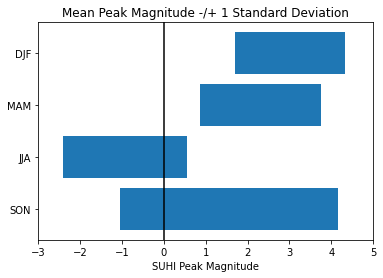

In [188]:
#make horizontal bar chart
fig, ax = plt.subplots()

a0_mean = seasons_terra_day[seasons_terra_day['CITY_COUNTRY'] == 'HUAMBO_ANGOLA'].a0.values
season = seasons_terra_day[seasons_terra_day['CITY_COUNTRY'] == 'HUAMBO_ANGOLA'].Season.values
a0_std = seasons_terra_day[seasons_terra_day['CITY_COUNTRY'] == 'HUAMBO_ANGOLA'].a0_sd.values
y_pos = np.arange(len(season))

ax.barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
ax.set_yticks(y_pos)
ax.set_yticklabels(season)
ax.set_xlim([-3,5])
plt.axline((0,0), (0,1), color = 'k') #plot line at 0
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('SUHI Peak Magnitude (K)')
ax.set_title('Mean Peak Magnitude -/+ 1 Standard Deviation')

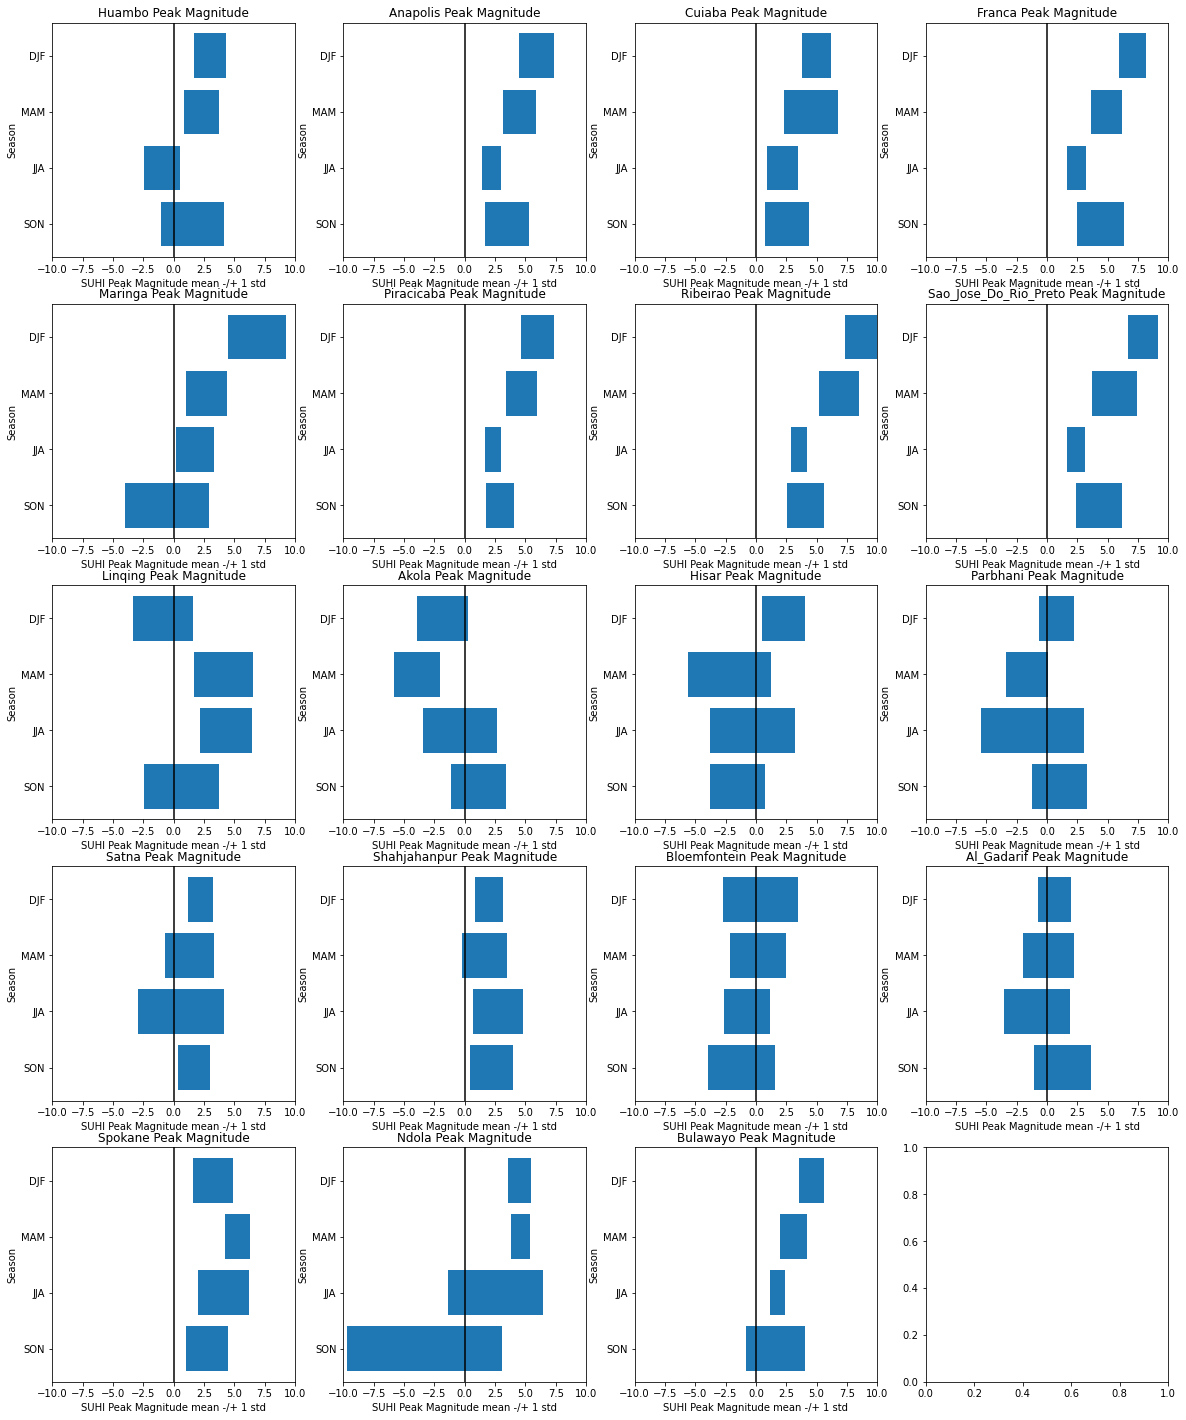

In [231]:
#function to calculate the row number of the subplot
def row_num_calc(i):
    if i < 4:
        row_num = 0
    elif i < 8:
        row_num = 1
    elif i < 12:
        row_num = 2
    elif i < 16:
        row_num = 3
    elif i < 20:
        row_num = 4
    return row_num

#for terra day
fig, ax = plt.subplots(5,4, figsize = (20, 25))

for i in range(len(set(seasons_terra_day['City']))):

    a0_mean = seasons_terra_day[seasons_terra_day['CITY_COUNTRY'] == seasons_terra_day['CITY_COUNTRY'][i]].a0.values
    season = seasons_terra_day[seasons_terra_day['CITY_COUNTRY'] == seasons_terra_day['CITY_COUNTRY'][i]].Season.values
    a0_std = seasons_terra_day[seasons_terra_day['CITY_COUNTRY'] == seasons_terra_day['CITY_COUNTRY'][i]].a0_sd.values
    y_pos = np.arange(len(season))
    city_name = seasons_terra_day['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(season)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 10:30'.format(city_name))


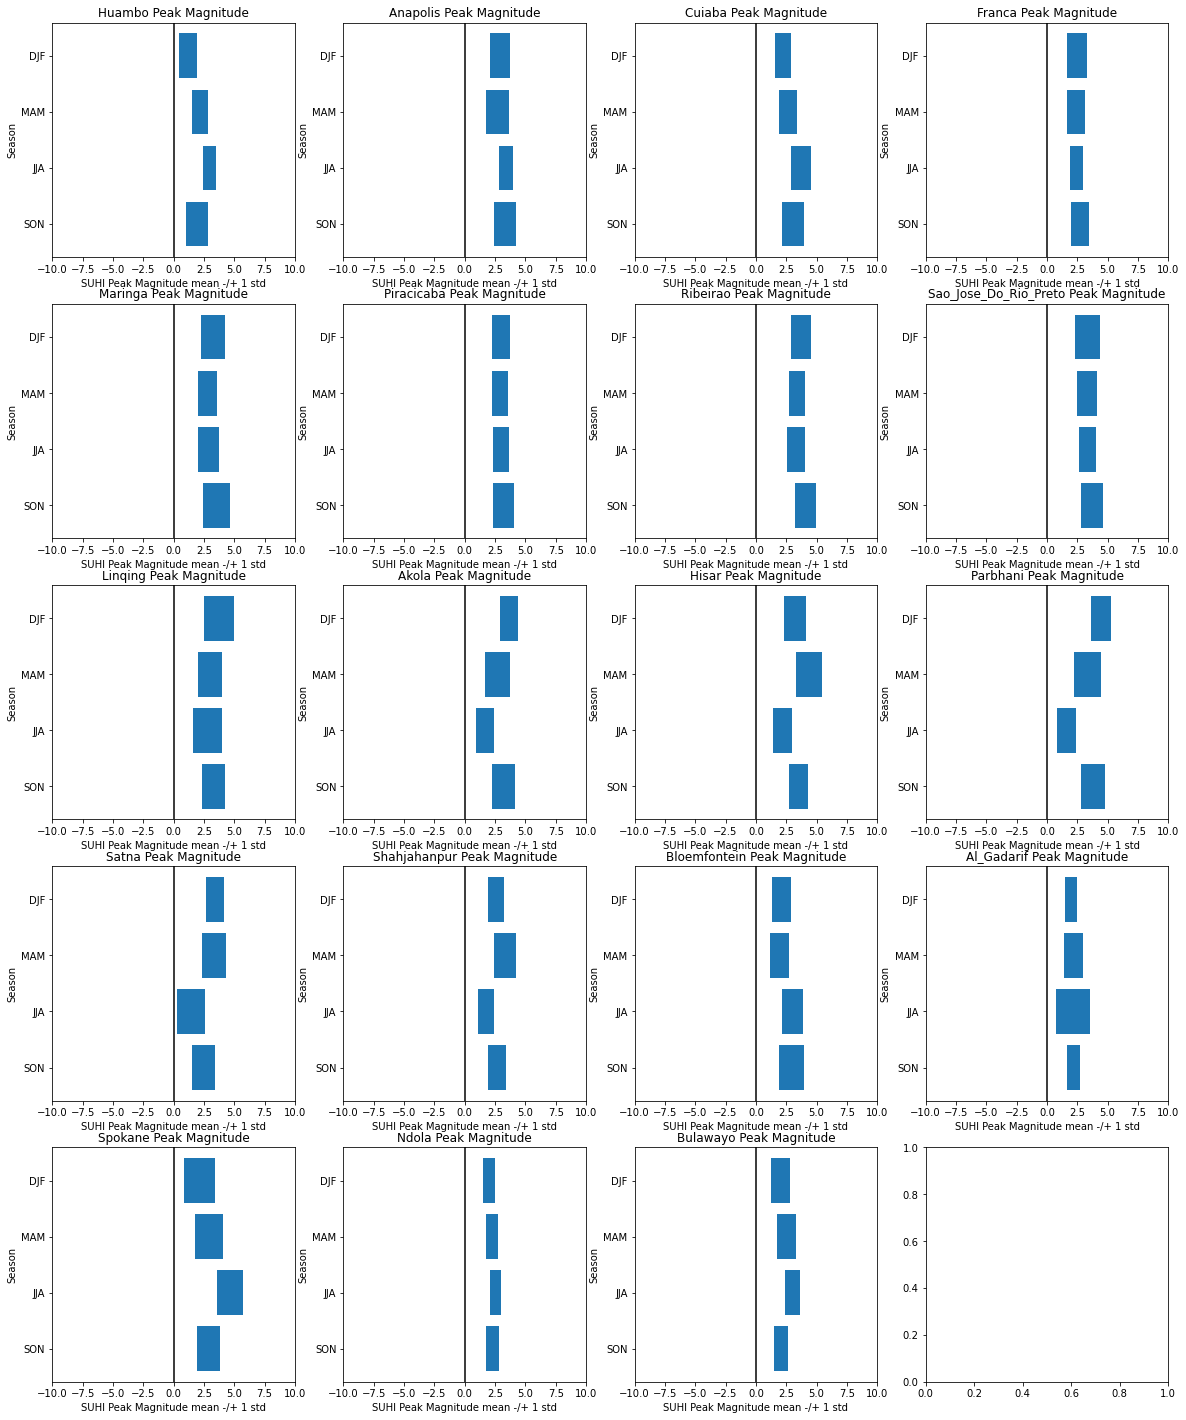

In [232]:
#for terra night
fig, ax = plt.subplots(5,4, figsize = (20, 25))

for i in range(len(set(seasons_terra_night['City']))):

    a0_mean = seasons_terra_night[seasons_terra_night['CITY_COUNTRY'] == seasons_terra_night['CITY_COUNTRY'][i]].a0.values
    season = seasons_terra_night[seasons_terra_night['CITY_COUNTRY'] == seasons_terra_night['CITY_COUNTRY'][i]].Season.values
    a0_std = seasons_terra_night[seasons_terra_night['CITY_COUNTRY'] == seasons_terra_night['CITY_COUNTRY'][i]].a0_sd.values
    y_pos = np.arange(len(season))
    city_name = seasons_terra_night['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(season)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 22:30'.format(city_name))

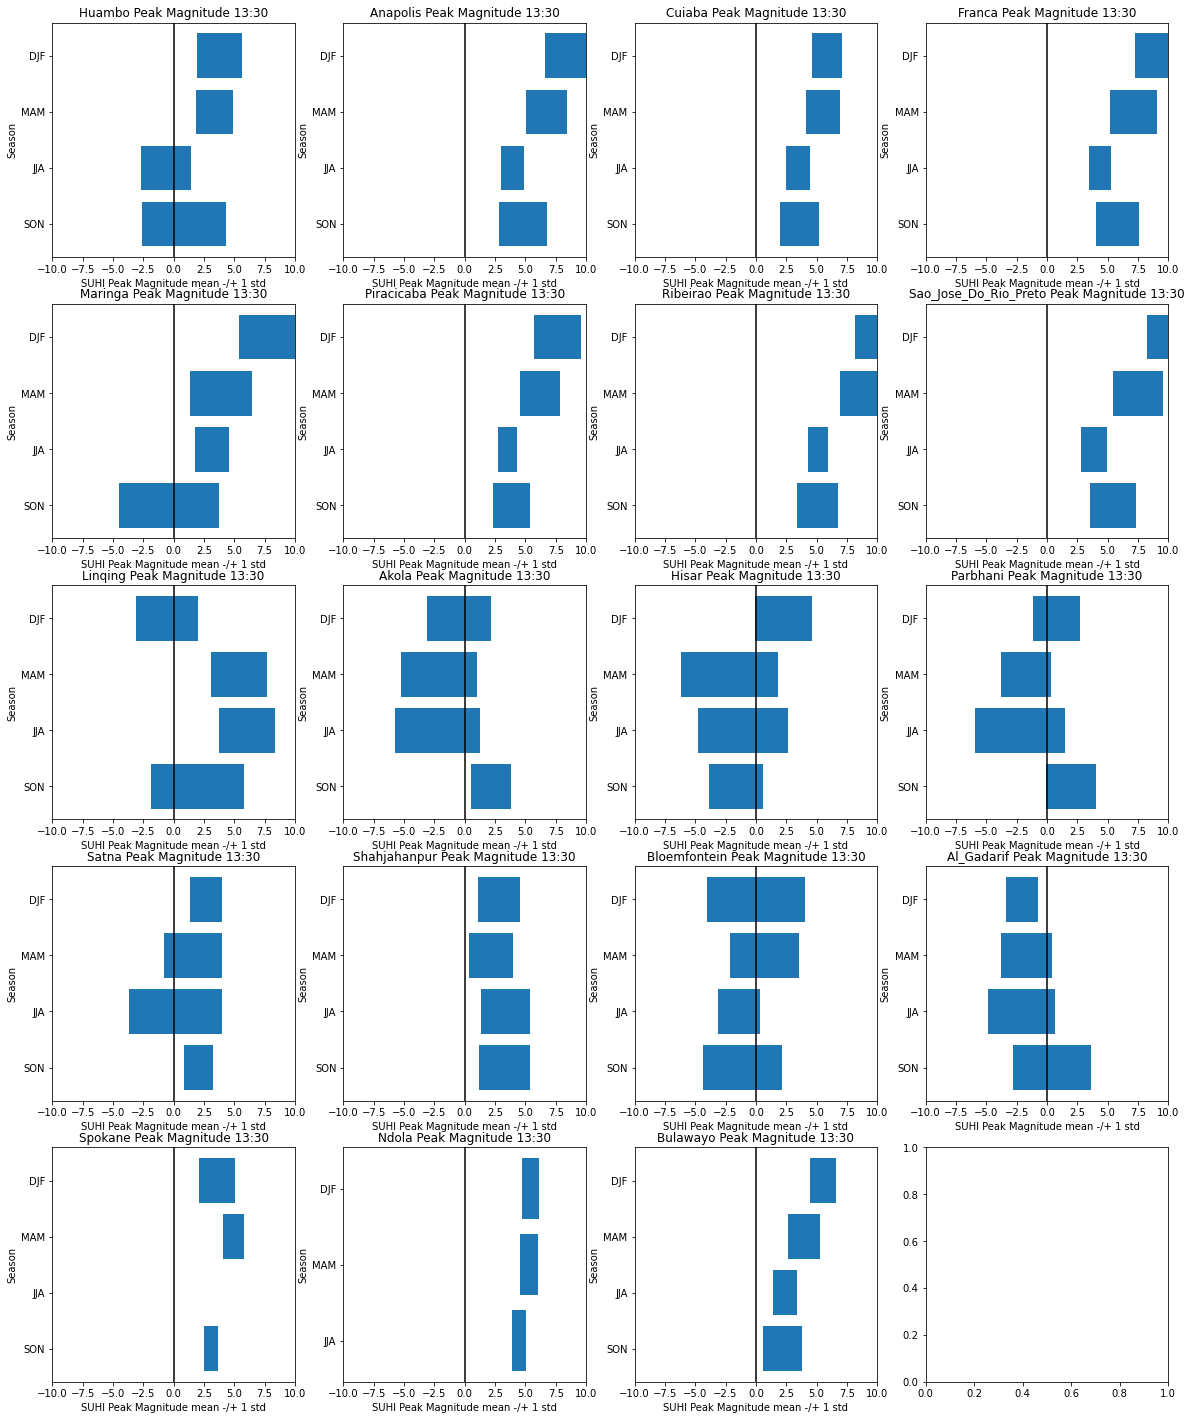

In [234]:
#for aqua day
fig, ax = plt.subplots(5,4, figsize = (20, 25))

for i in range(len(set(seasons_aqua_day['City']))):

    a0_mean = seasons_aqua_day[seasons_aqua_day['CITY_COUNTRY'] == seasons_aqua_day['CITY_COUNTRY'][i]].a0.values
    season = seasons_aqua_day[seasons_aqua_day['CITY_COUNTRY'] == seasons_aqua_day['CITY_COUNTRY'][i]].Season.values
    a0_std = seasons_aqua_day[seasons_aqua_day['CITY_COUNTRY'] == seasons_aqua_day['CITY_COUNTRY'][i]].a0_sd.values
    y_pos = np.arange(len(season))
    city_name = seasons_aqua_day['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(season)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 13:30'.format(city_name))

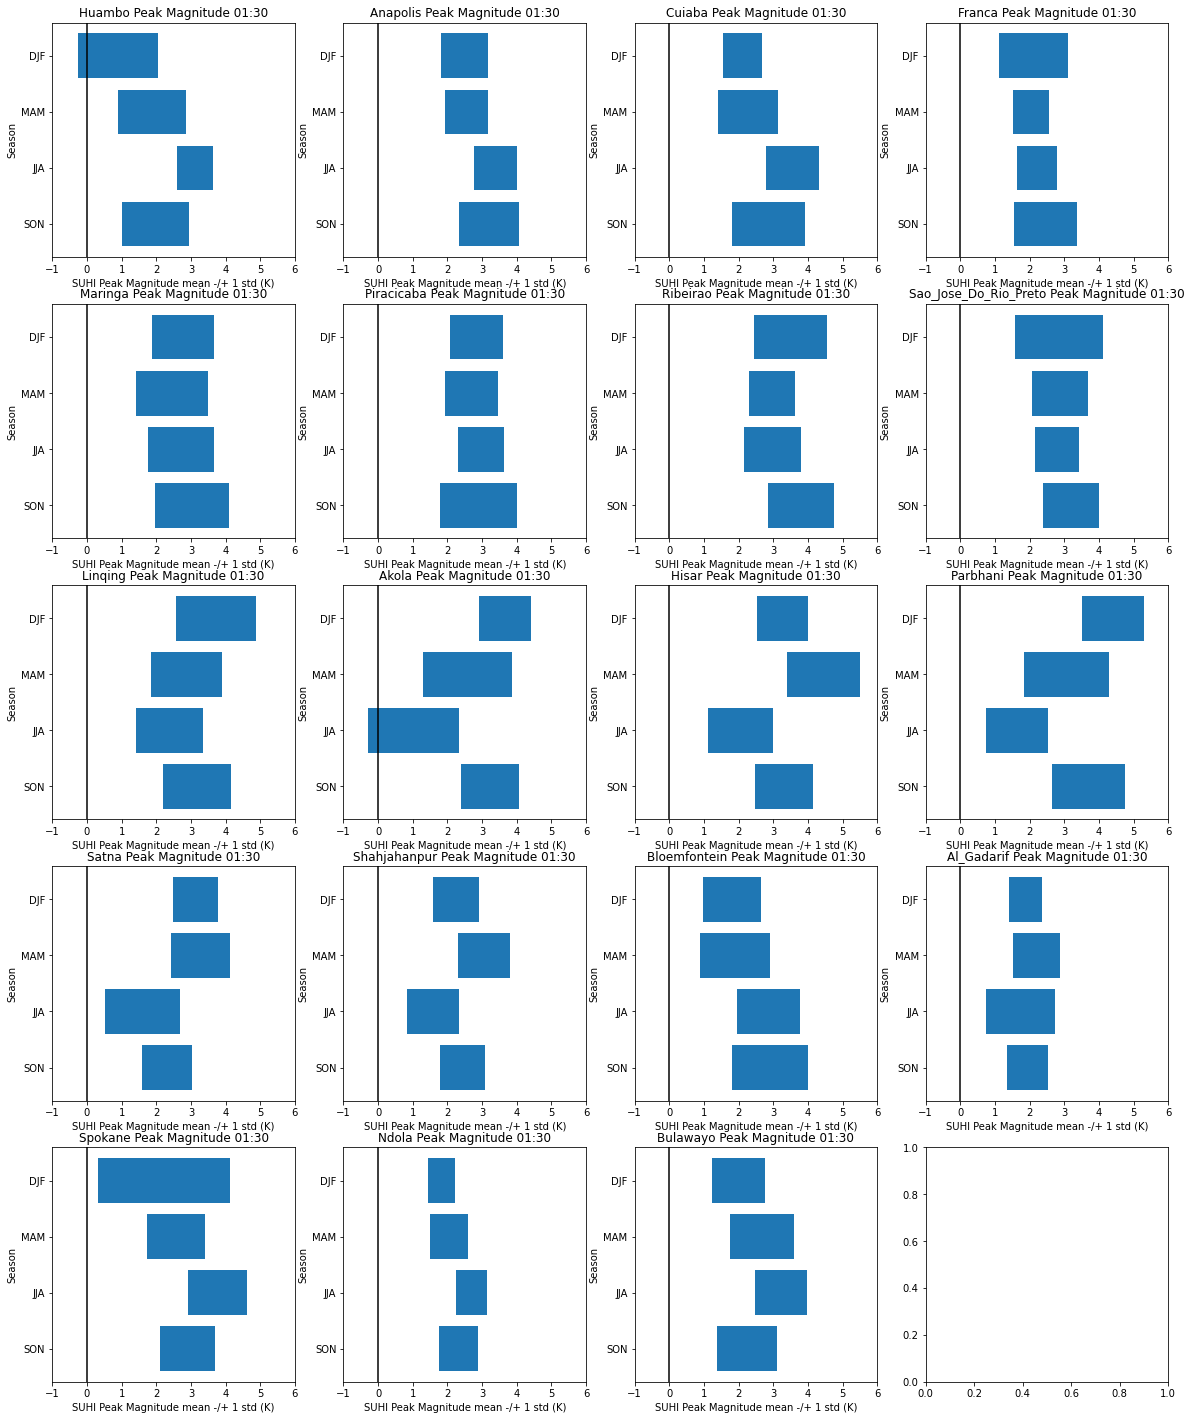

In [330]:
#for aqua night
fig, ax = plt.subplots(5,4, figsize = (20, 25))

for i in range(len(set(seasons_aqua_night['City']))):

    a0_mean = seasons_aqua_night[seasons_aqua_night['CITY_COUNTRY'] == seasons_aqua_night['CITY_COUNTRY'][i]].a0.values
    season = seasons_aqua_night[seasons_aqua_night['CITY_COUNTRY'] == seasons_aqua_night['CITY_COUNTRY'][i]].Season.values
    a0_std = seasons_aqua_night[seasons_aqua_night['CITY_COUNTRY'] == seasons_aqua_night['CITY_COUNTRY'][i]].a0_sd.values
    y_pos = np.arange(len(season))
    city_name = seasons_aqua_night['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(season)
    ax[plotrow,plotcol].set_xlim([-1,6])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 01:30'.format(city_name))

In [235]:
seasons_aqua_day

,CITY_COUNTRY,City,Season,a0,a0_sd,SUHI_mean,SUHI_mean_sd,footprint_area,footprint_area_sd
0,HUAMBO_ANGOLA,Huambo,DJF,3.781072,1.830574,1.756642,1.624388,235.359171,122.665742
1,ANAPOLIS_BRAZIL,Anapolis,DJF,8.611467,2.015979,5.350630,1.918373,231.343097,78.216123
2,CUIABA_BRAZIL,Cuiaba,DJF,5.855709,1.260676,4.090252,1.197007,301.967971,89.414853
3,FRANCA_BRAZIL,Franca,DJF,9.264540,1.975461,5.865692,2.293351,114.056285,35.633947
4,MARINGA_BRAZIL,Maringa,DJF,8.473131,3.059757,5.358700,2.502624,284.169195,141.246565
...,...,...,...,...,...,...,...,...,...
71,BLOEMFONTEIN_SOUTH_AFRICA,Bloemfontein,SON,-1.083842,3.238444,-0.478648,1.002001,196.065679,121.040798
72,AL_GADARIF_SUDAN,Al_Gadarif,SON,0.436295,3.200810,0.237502,1.622856,130.551261,84.040973
73,SPOKANE_UNITED_STATES,Spokane,SON,3.052571,0.585451,1.037572,0.909787,198.270372,107.047075
74,NDOLA_ZAMBIA,Ndola,SON,-9.049541,NaN,1.424880,1.310483,30.906559,NaN


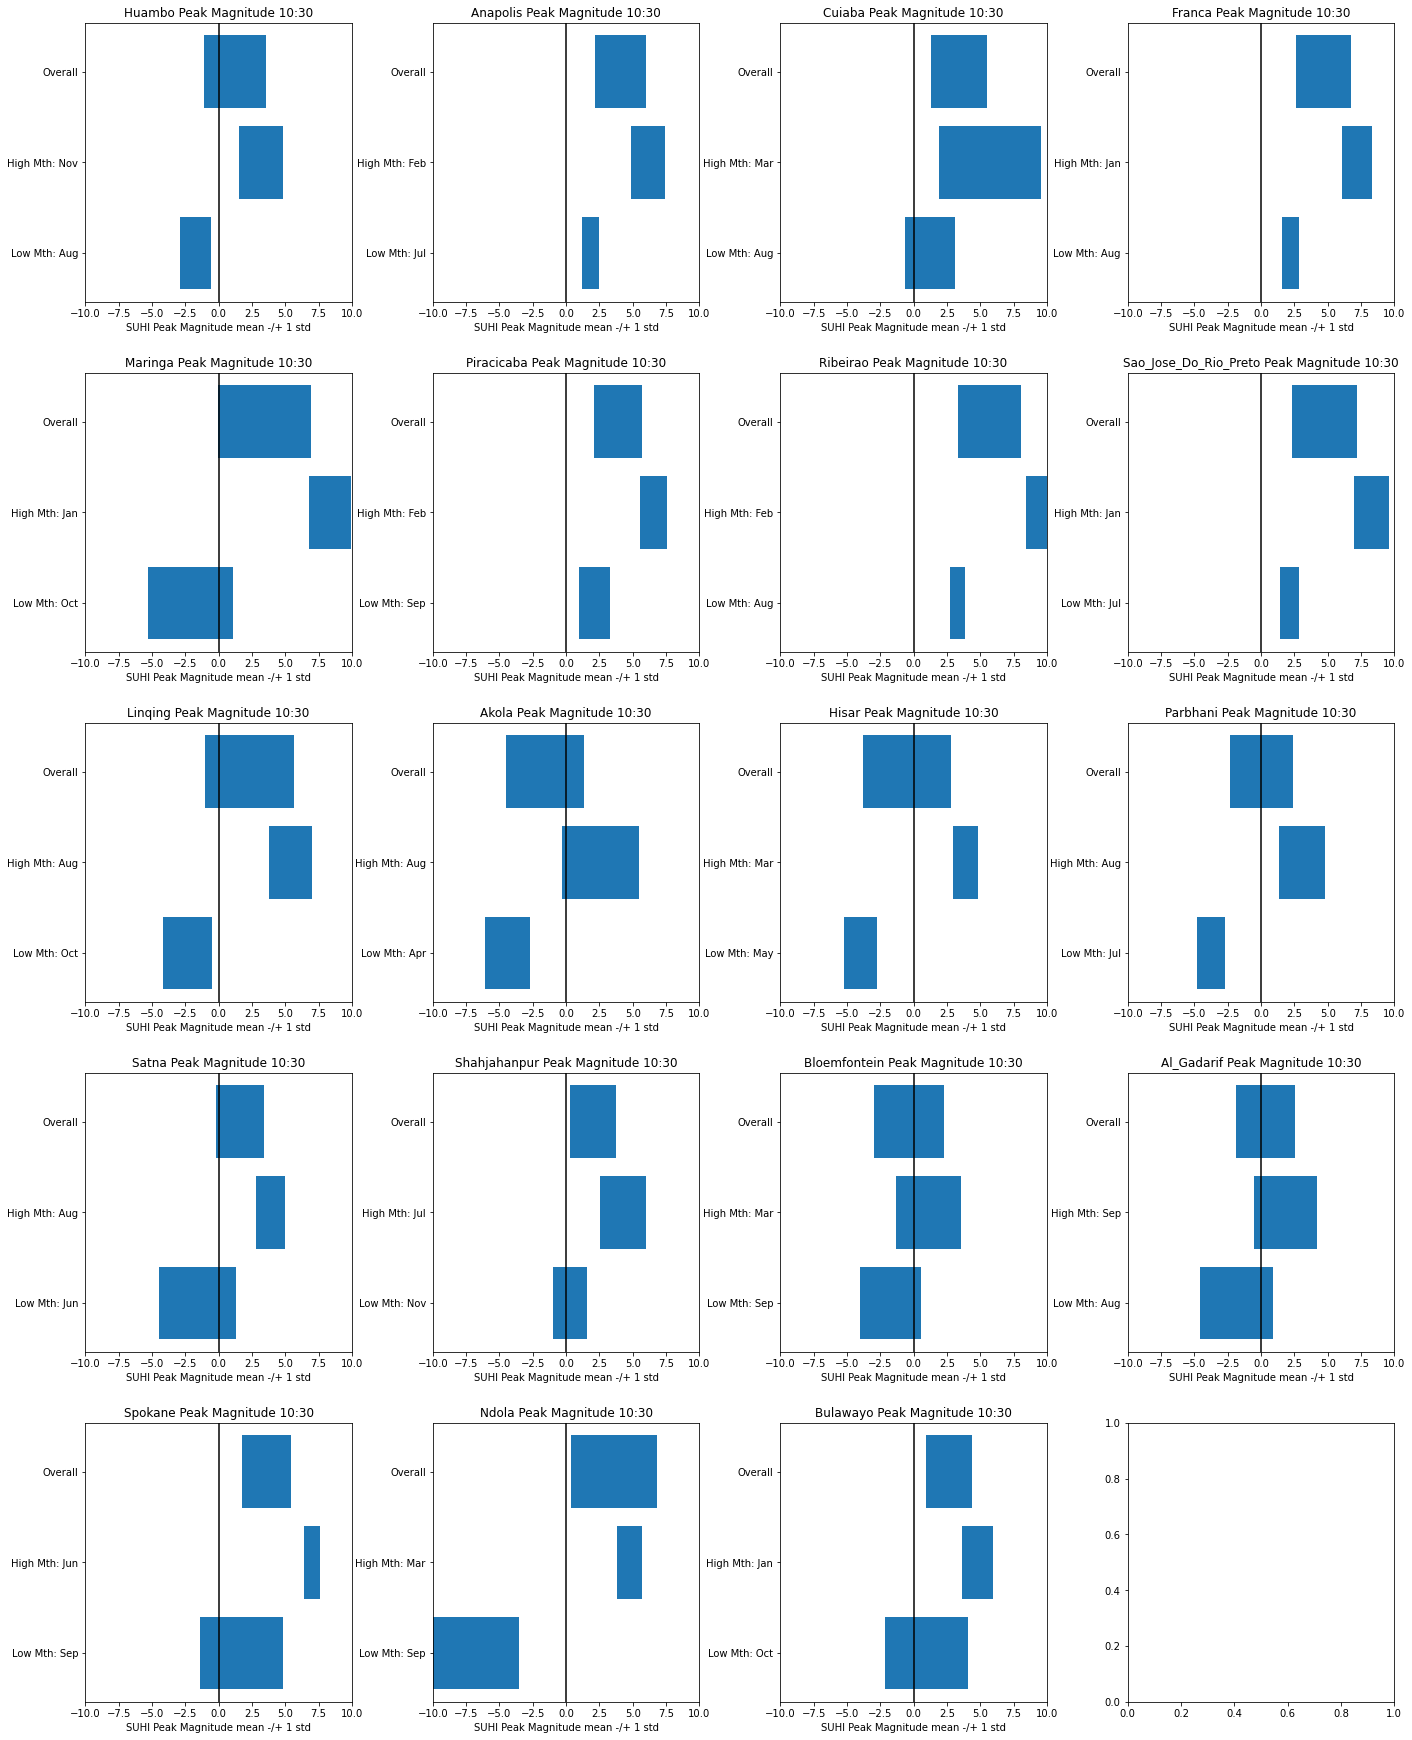

In [287]:
#plot the max and min months and values
#for terra day

fig, ax = plt.subplots(5,4, figsize = (20, 25))
fig.tight_layout(pad=5.0)

for i in range(len(set(max_mins_terra_day['City']))):

    a0_mean=np.array([max_mins_terra_day.iloc[i].overall_a0, max_mins_terra_day.iloc[i].peak_month_a0, 
             max_mins_terra_day.iloc[i].low_month_a0]) 
    mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    high_mon = mons[int(max_mins_terra_day.iloc[i].peak_month) - 1]
    low_mon = mons[int(max_mins_terra_day.iloc[i].low_month) - 1] 
    ylabels = ['Overall','High Mth: {}'.format(high_mon),'Low Mth: {}'.format(low_mon)] 
    a0_std = np.array([max_mins_terra_day.iloc[i].overall_a0_sd, max_mins_terra_day.iloc[i].peak_month_a0_sd, 
        max_mins_terra_day.iloc[i].low_month_a0_sd])
    y_pos = np.arange(len(ylabels))
    city_name = max_mins_terra_day['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(ylabels)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    #ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 10:30'.format(city_name))

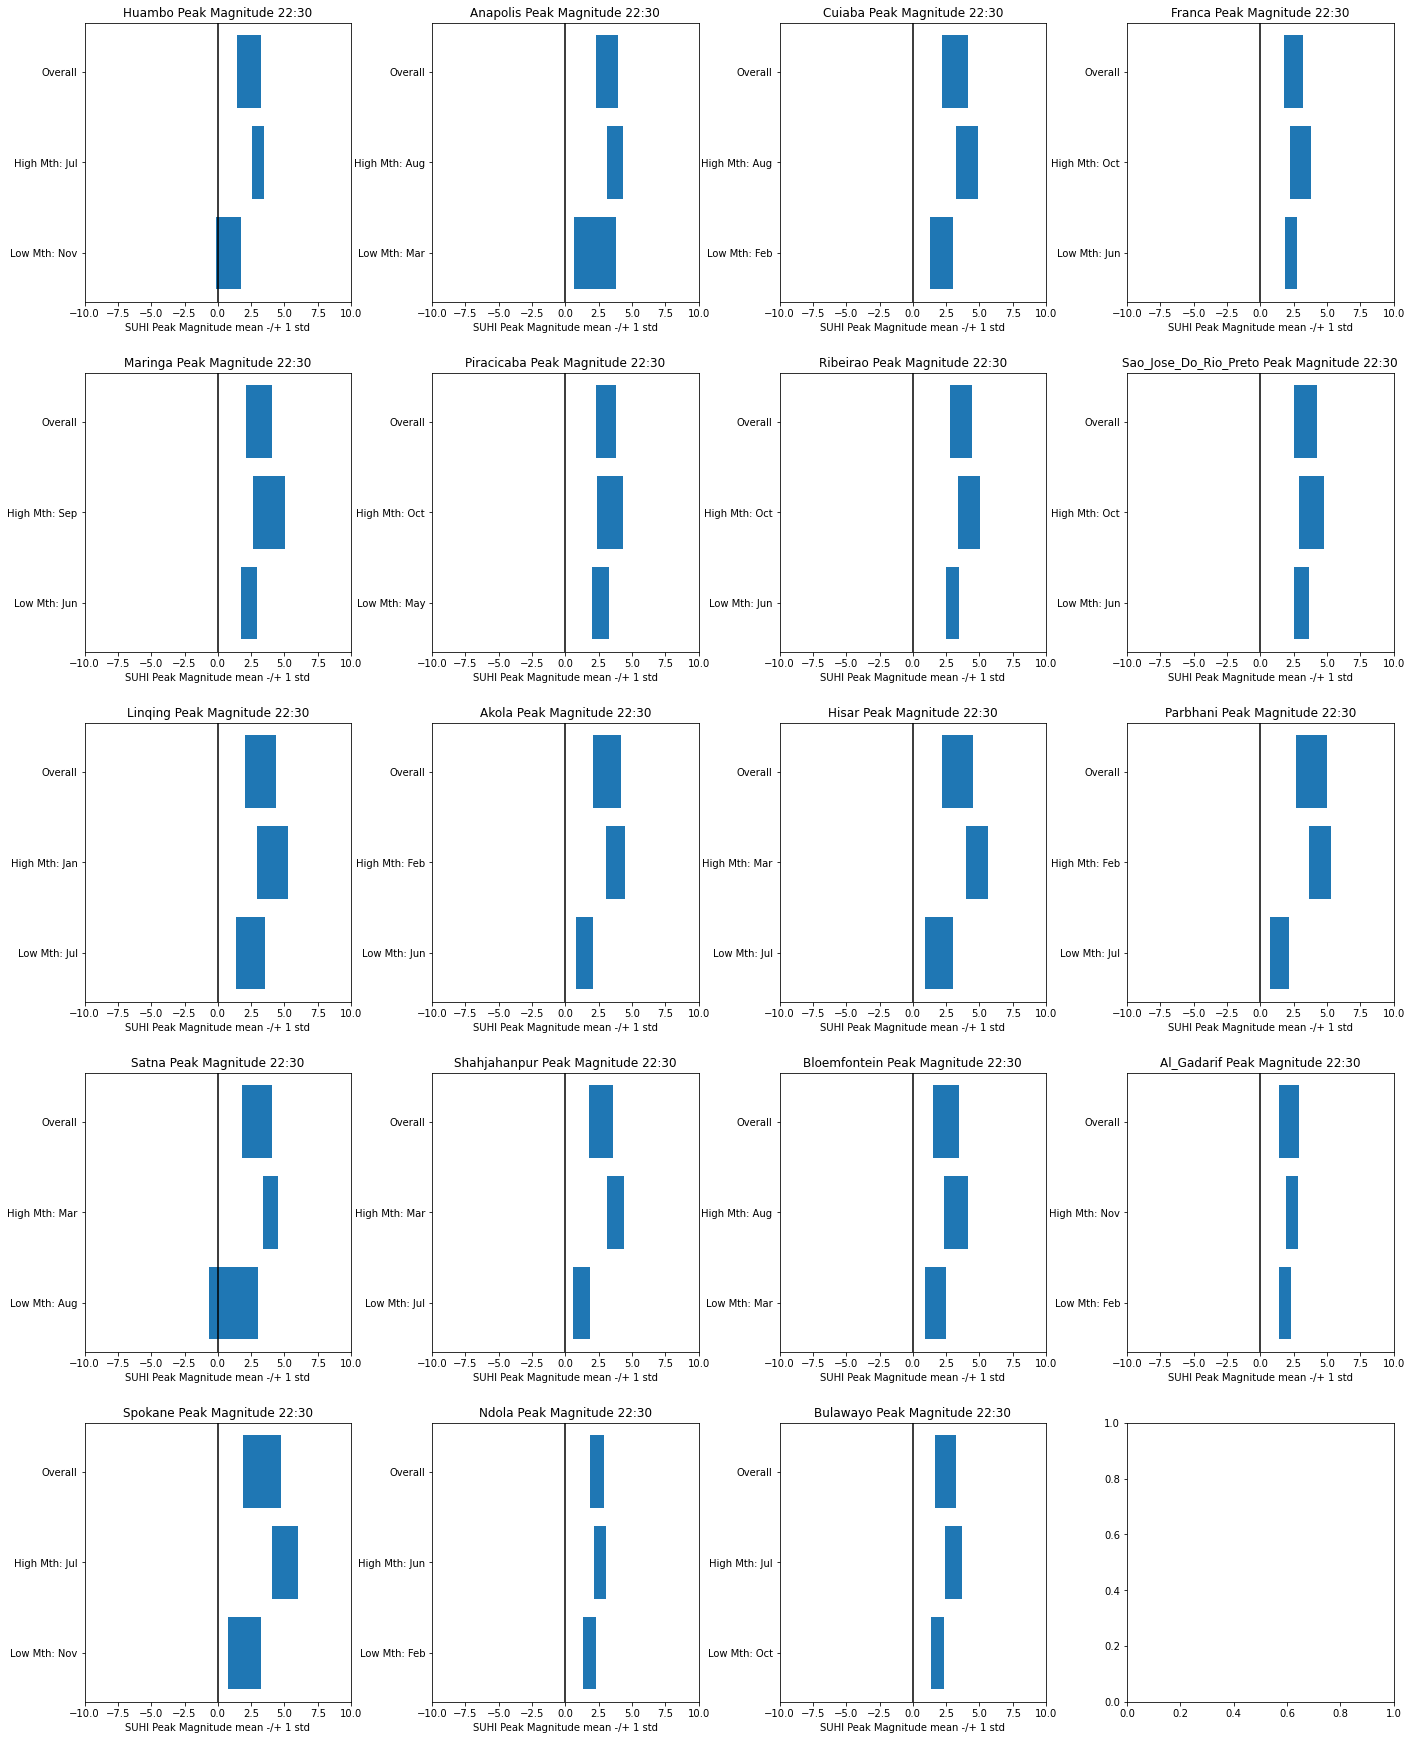

In [284]:
#plot the max and min months and values
#for terra night

fig, ax = plt.subplots(5,4, figsize = (20, 25))
fig.tight_layout(pad=5.0)

for i in range(len(set(max_mins_terra_night['City']))):

    a0_mean=np.array([max_mins_terra_night.iloc[i].overall_a0, max_mins_terra_night.iloc[i].peak_month_a0, 
             max_mins_terra_night.iloc[i].low_month_a0]) 
    mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    high_mon = mons[int(max_mins_terra_night.iloc[i].peak_month) - 1]
    low_mon = mons[int(max_mins_terra_night.iloc[i].low_month) - 1] 
    ylabels = ['Overall','High Mth: {}'.format(high_mon),'Low Mth: {}'.format(low_mon)] 
    a0_std = np.array([max_mins_terra_night.iloc[i].overall_a0_sd, max_mins_terra_night.iloc[i].peak_month_a0_sd, 
        max_mins_terra_night.iloc[i].low_month_a0_sd])
    y_pos = np.arange(len(ylabels))
    city_name = max_mins_terra_night['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(ylabels)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    #ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 22:30'.format(city_name))

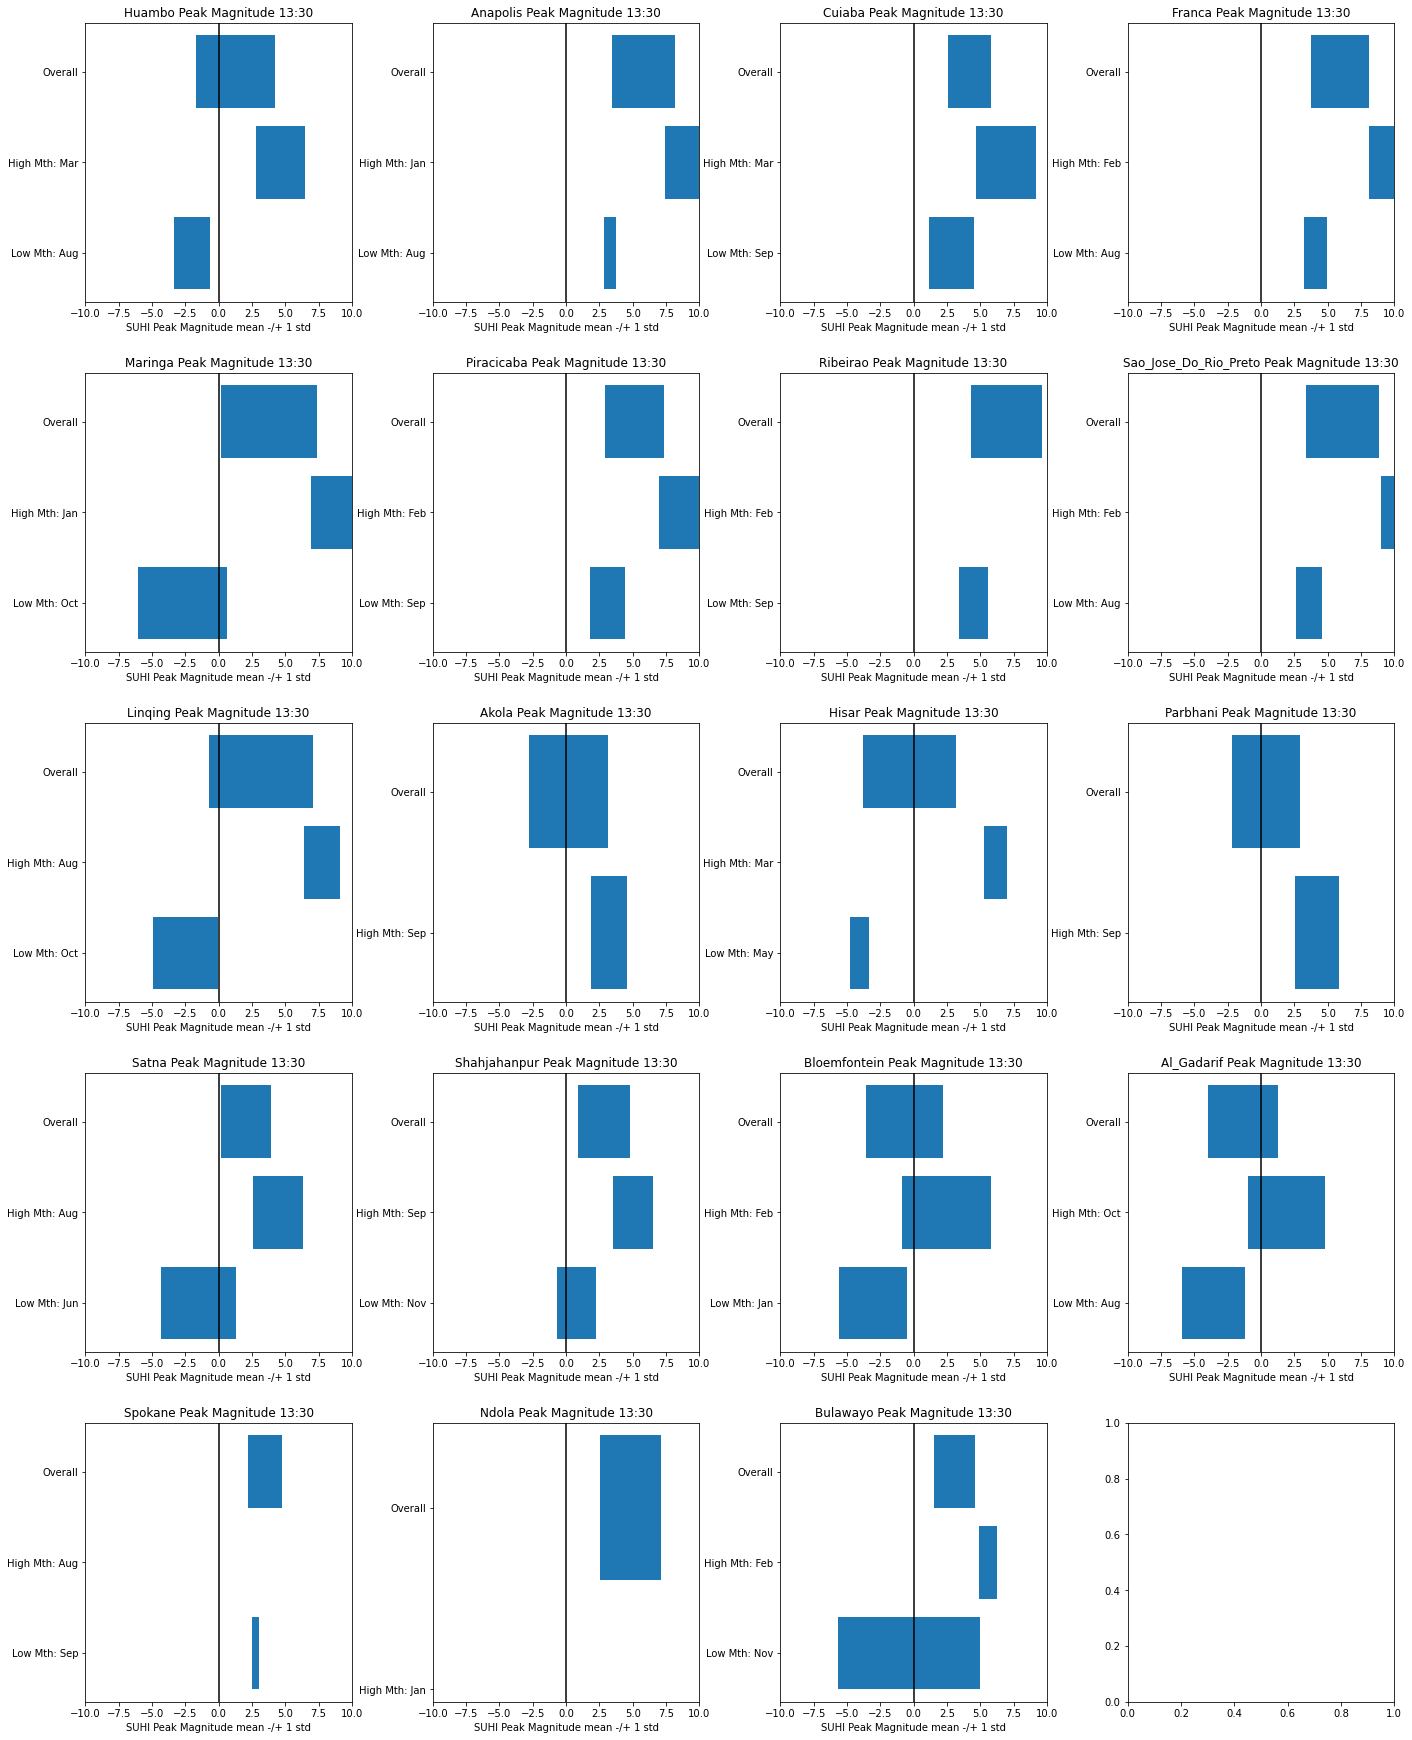

In [285]:
#plot the max and min months and values
#for aqua day

fig, ax = plt.subplots(5,4, figsize = (20, 25))
fig.tight_layout(pad=5.0)

for i in range(len(set(max_mins_aqua_day['City']))):

    a0_mean=np.array([max_mins_aqua_day.iloc[i].overall_a0, max_mins_aqua_day.iloc[i].peak_month_a0, 
             max_mins_aqua_day.iloc[i].low_month_a0]) 
    mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    high_mon = mons[int(max_mins_aqua_day.iloc[i].peak_month) - 1]
    low_mon = mons[int(max_mins_aqua_day.iloc[i].low_month) - 1] 
    ylabels = ['Overall','High Mth: {}'.format(high_mon),'Low Mth: {}'.format(low_mon)] 
    a0_std = np.array([max_mins_aqua_day.iloc[i].overall_a0_sd, max_mins_aqua_day.iloc[i].peak_month_a0_sd, 
        max_mins_aqua_day.iloc[i].low_month_a0_sd])
    y_pos = np.arange(len(ylabels))
    city_name = max_mins_aqua_day['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(ylabels)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    #ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 13:30'.format(city_name))

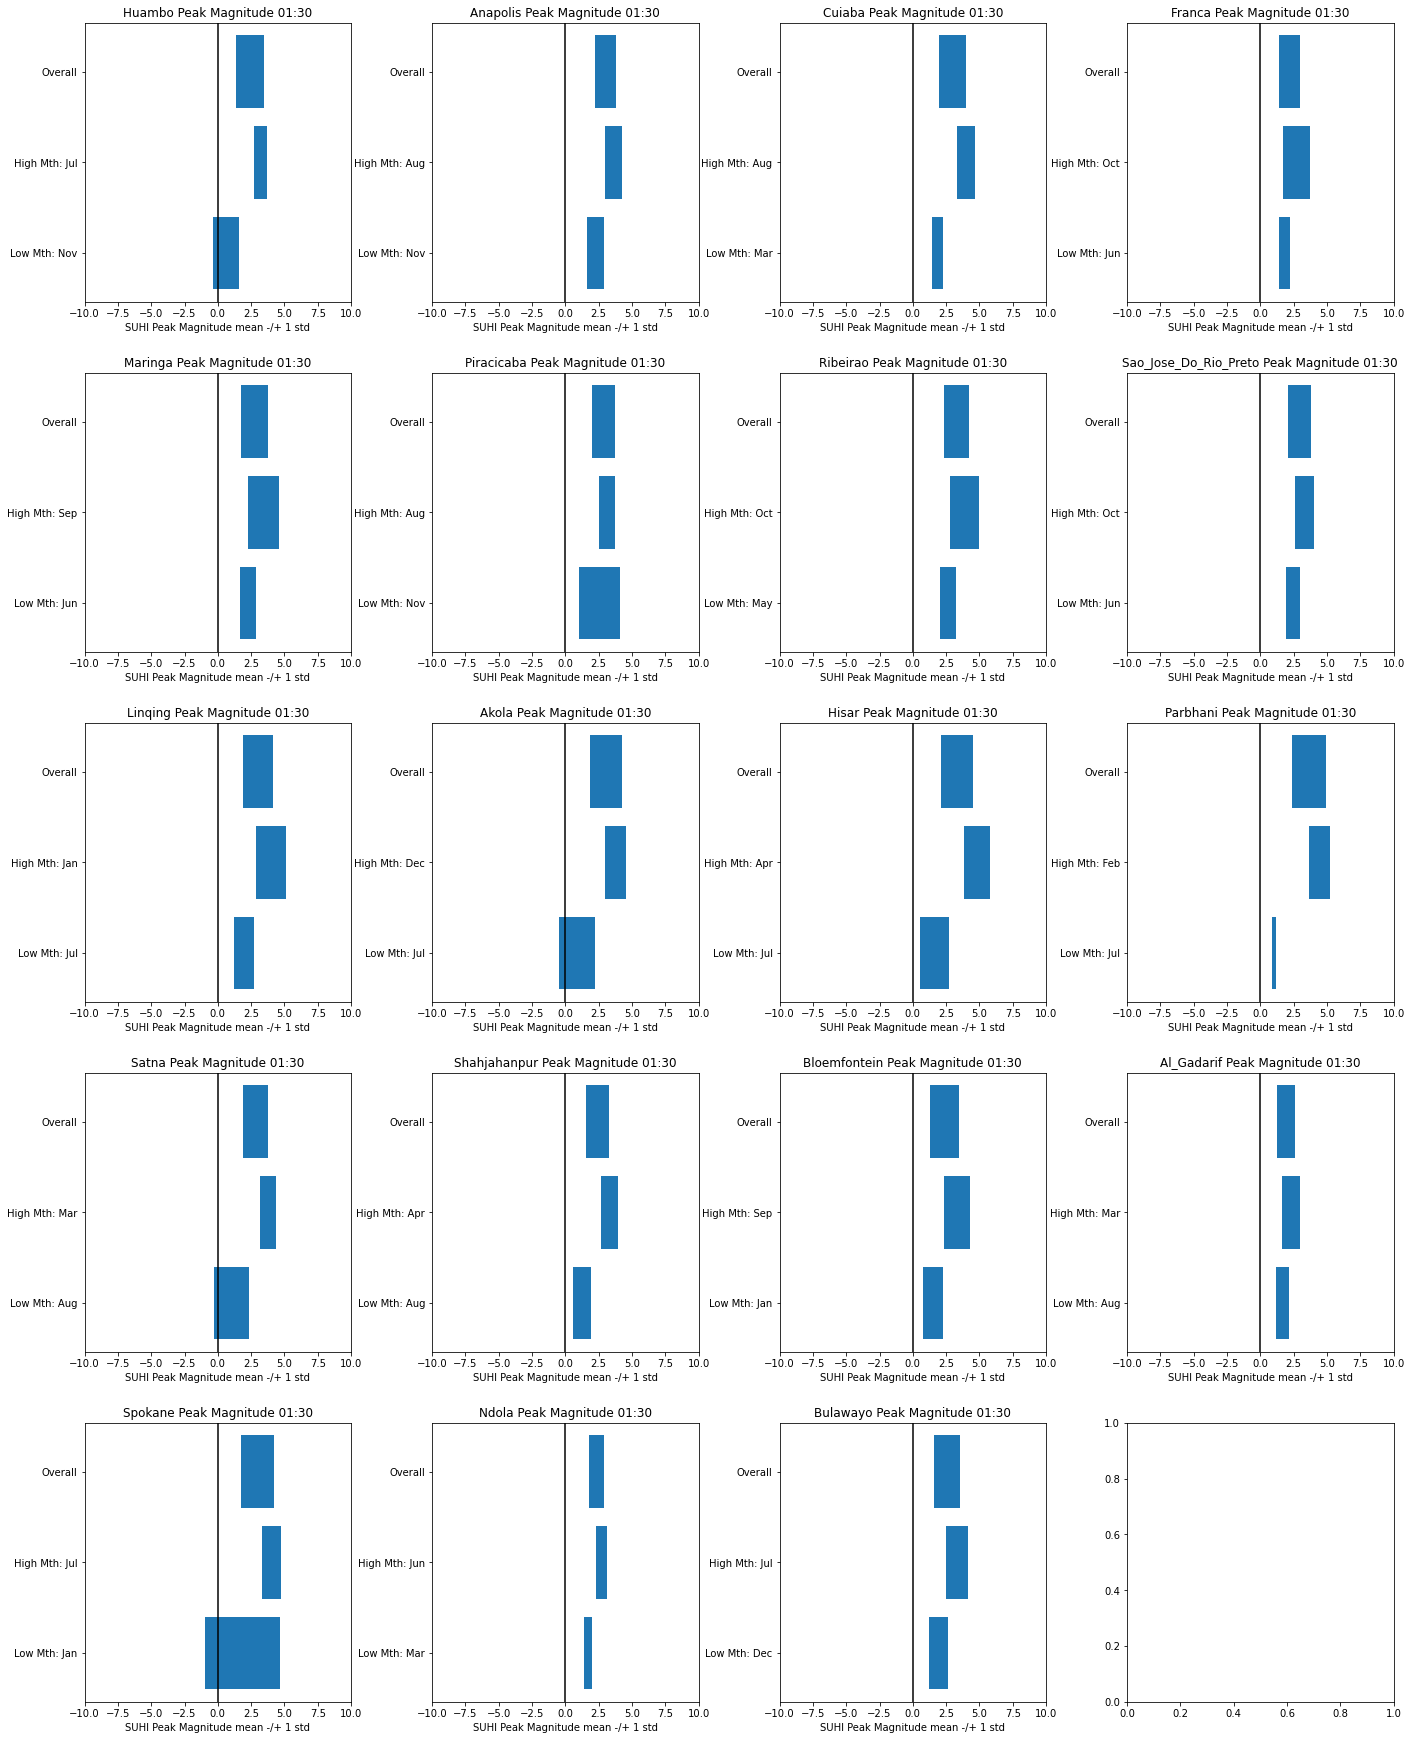

In [286]:
#plot the max and min months and values
#for aqua night

fig, ax = plt.subplots(5,4, figsize = (20, 25))
fig.tight_layout(pad=5.0)

for i in range(len(set(max_mins_aqua_night['City']))):

    a0_mean=np.array([max_mins_aqua_night.iloc[i].overall_a0, max_mins_aqua_night.iloc[i].peak_month_a0, 
             max_mins_aqua_night.iloc[i].low_month_a0]) 
    mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    high_mon = mons[int(max_mins_aqua_night.iloc[i].peak_month) - 1]
    low_mon = mons[int(max_mins_aqua_night.iloc[i].low_month) - 1] 
    ylabels = ['Overall','High Mth: {}'.format(high_mon),'Low Mth: {}'.format(low_mon)] 
    a0_std = np.array([max_mins_aqua_night.iloc[i].overall_a0_sd, max_mins_aqua_night.iloc[i].peak_month_a0_sd, 
        max_mins_aqua_night.iloc[i].low_month_a0_sd])
    y_pos = np.arange(len(ylabels))
    city_name = max_mins_aqua_night['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*a0_std, left = a0_mean - a0_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(ylabels)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    #ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 01:30'.format(city_name))

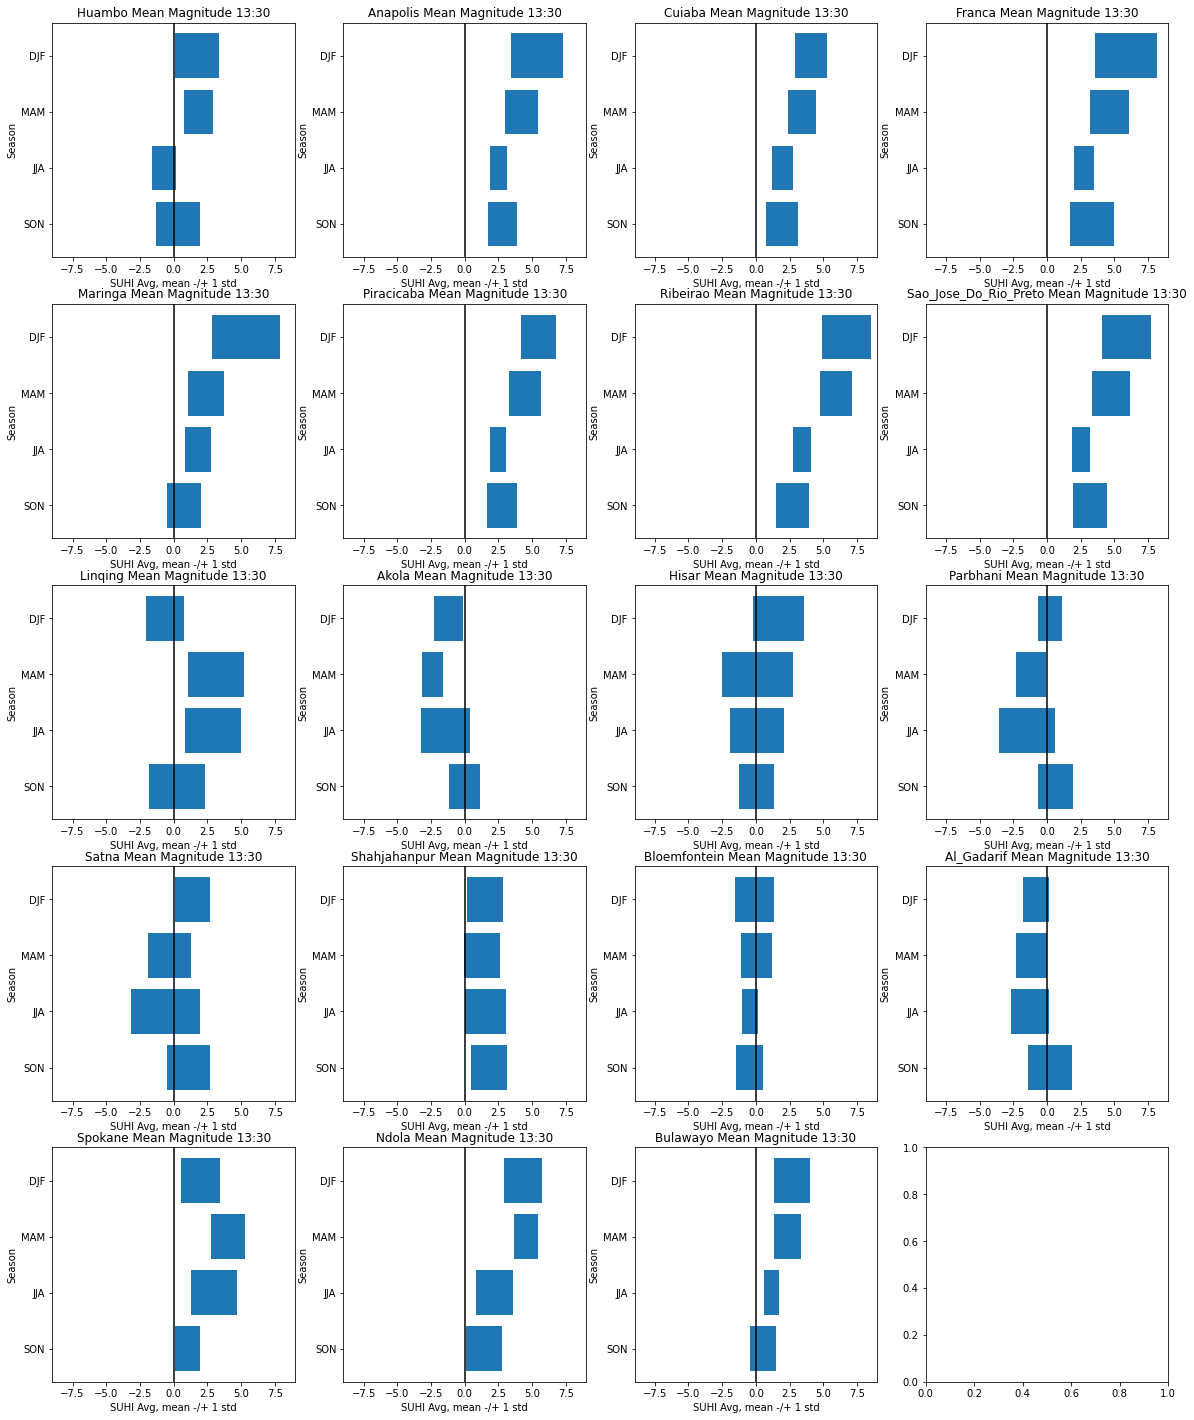

In [292]:
#Average SUHI
#seasons, aqua day
fig, ax = plt.subplots(5,4, figsize = (20, 25))

for i in range(len(set(seasons_aqua_day['City']))):

    SUHI_mean = seasons_aqua_day[seasons_aqua_day['CITY_COUNTRY'] == seasons_aqua_day['CITY_COUNTRY'][i]].SUHI_mean.values
    season = seasons_aqua_day[seasons_aqua_day['CITY_COUNTRY'] == seasons_aqua_day['CITY_COUNTRY'][i]].Season.values
    SUHI_mean_std = seasons_aqua_day[seasons_aqua_day['CITY_COUNTRY'] == seasons_aqua_day['CITY_COUNTRY'][i]].SUHI_mean_sd.values
    y_pos = np.arange(len(season))
    city_name = seasons_aqua_day['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*SUHI_mean_std, left = SUHI_mean - SUHI_mean_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(season)
    ax[plotrow,plotcol].set_xlim([-9,9])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Avg, mean -/+ 1 std (K)')
    ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Mean Magnitude 13:30'.format(city_name))

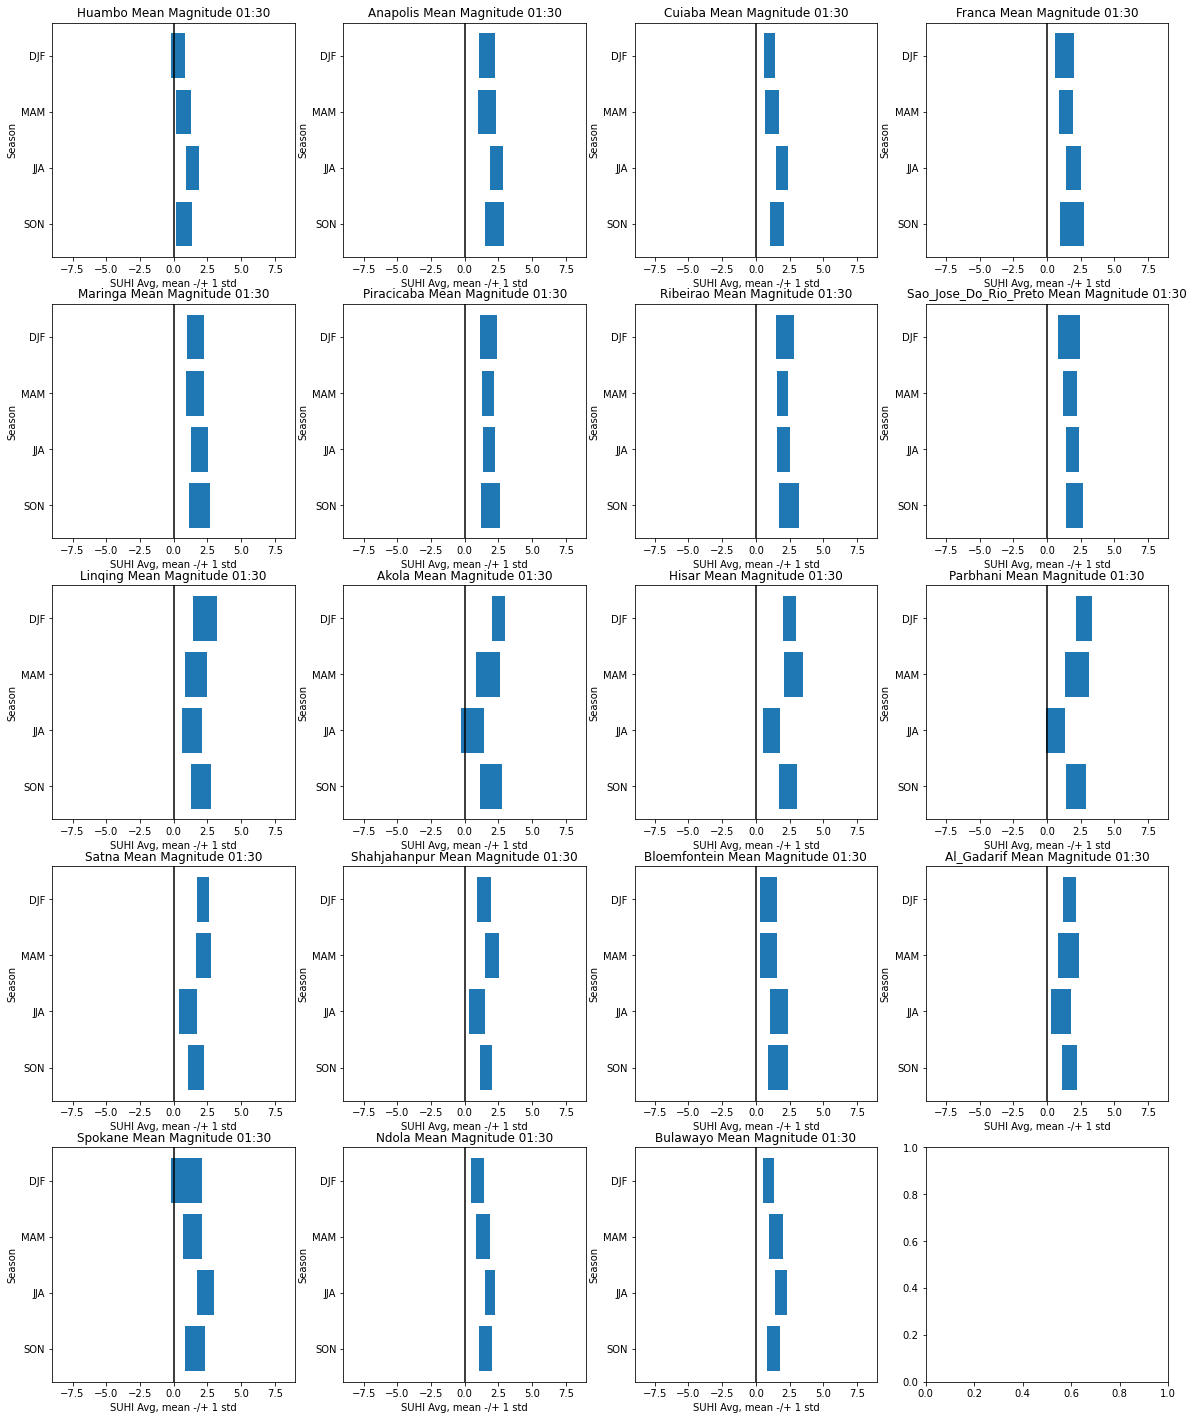

In [293]:
#Average SUHI
#seasons, aqua night
fig, ax = plt.subplots(5,4, figsize = (20, 25))

for i in range(len(set(seasons_aqua_night['City']))):

    SUHI_mean = seasons_aqua_night[seasons_aqua_night['CITY_COUNTRY'] == seasons_aqua_night['CITY_COUNTRY'][i]].SUHI_mean.values
    season = seasons_aqua_night[seasons_aqua_night['CITY_COUNTRY'] == seasons_aqua_night['CITY_COUNTRY'][i]].Season.values
    SUHI_mean_std = seasons_aqua_night[seasons_aqua_night['CITY_COUNTRY'] == seasons_aqua_night['CITY_COUNTRY'][i]].SUHI_mean_sd.values
    y_pos = np.arange(len(season))
    city_name = seasons_aqua_night['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*SUHI_mean_std, left = SUHI_mean - SUHI_mean_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(season)
    ax[plotrow,plotcol].set_xlim([-9,9])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Avg, mean -/+ 1 std (K)')
    ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Mean Magnitude 01:30'.format(city_name))

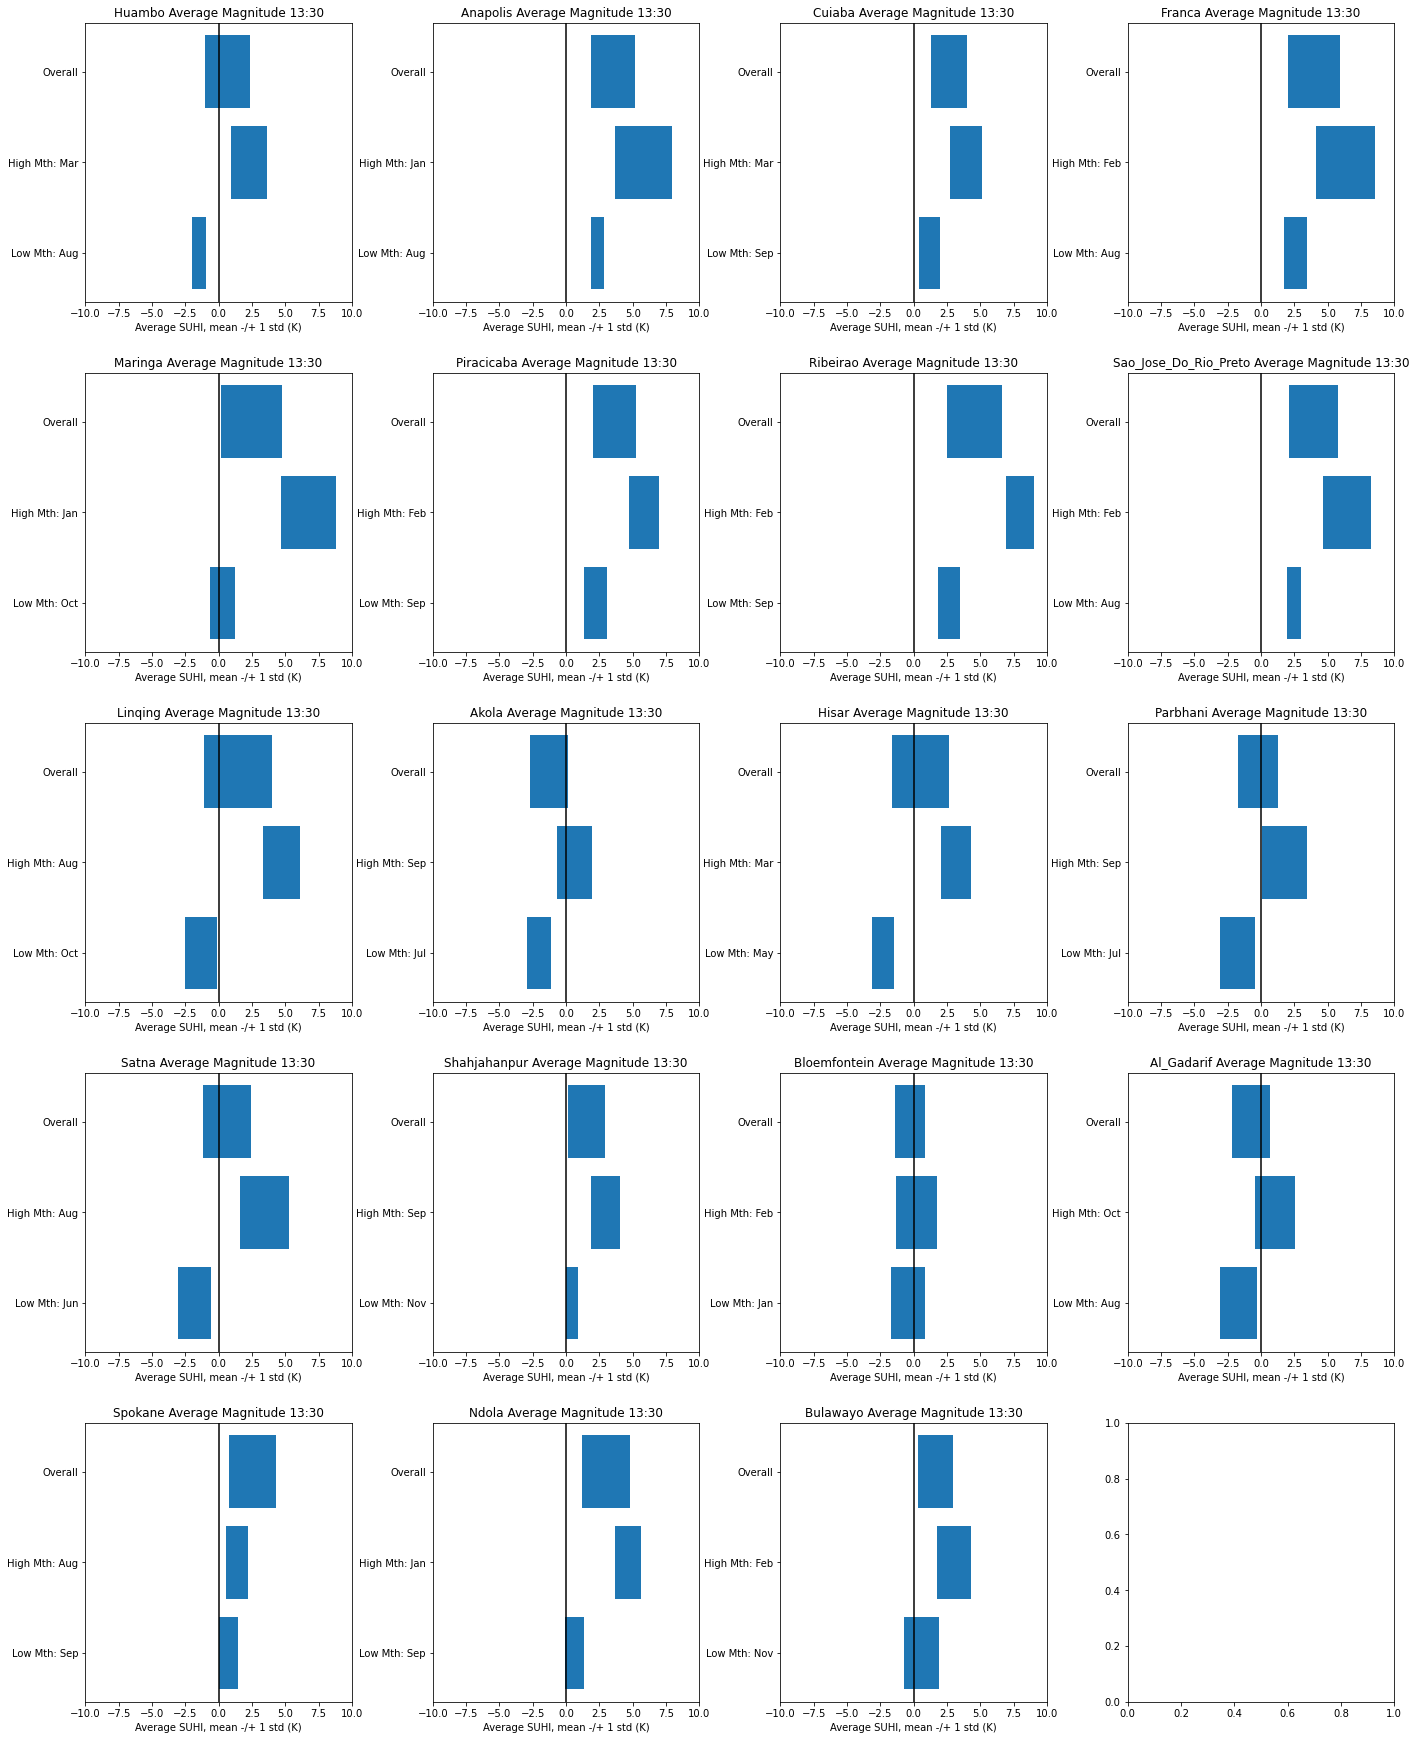

In [301]:
#SUHI mean
#plot the max and min months and values
#for aqua day

fig, ax = plt.subplots(5,4, figsize = (20, 25))
fig.tight_layout(pad=5.0)

for i in range(len(set(max_mins_aqua_day['City']))):

    SUHI_mean=np.array([max_mins_aqua_day.iloc[i].overall_SUHI_mean, max_mins_aqua_day.iloc[i].peak_month_SUHI_mean, 
             max_mins_aqua_day.iloc[i].low_month_SUHI_mean]) 
    mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    high_mon = mons[int(max_mins_aqua_day.iloc[i].peak_month) - 1]
    low_mon = mons[int(max_mins_aqua_day.iloc[i].low_month) - 1] 
    ylabels = ['Overall','High Mth: {}'.format(high_mon),'Low Mth: {}'.format(low_mon)] 
    SUHI_mean_std = np.array([max_mins_aqua_day.iloc[i].overall_SUHI_mean_sd, max_mins_aqua_day.iloc[i].peak_month_SUHI_mean_sd, 
        max_mins_aqua_day.iloc[i].low_month_SUHI_mean_sd])
    y_pos = np.arange(len(ylabels))
    city_name = max_mins_aqua_day['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*SUHI_mean_std, left = SUHI_mean - SUHI_mean_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(ylabels)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('Average SUHI, mean -/+ 1 std (K)')
    #ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Average Magnitude 13:30'.format(city_name))

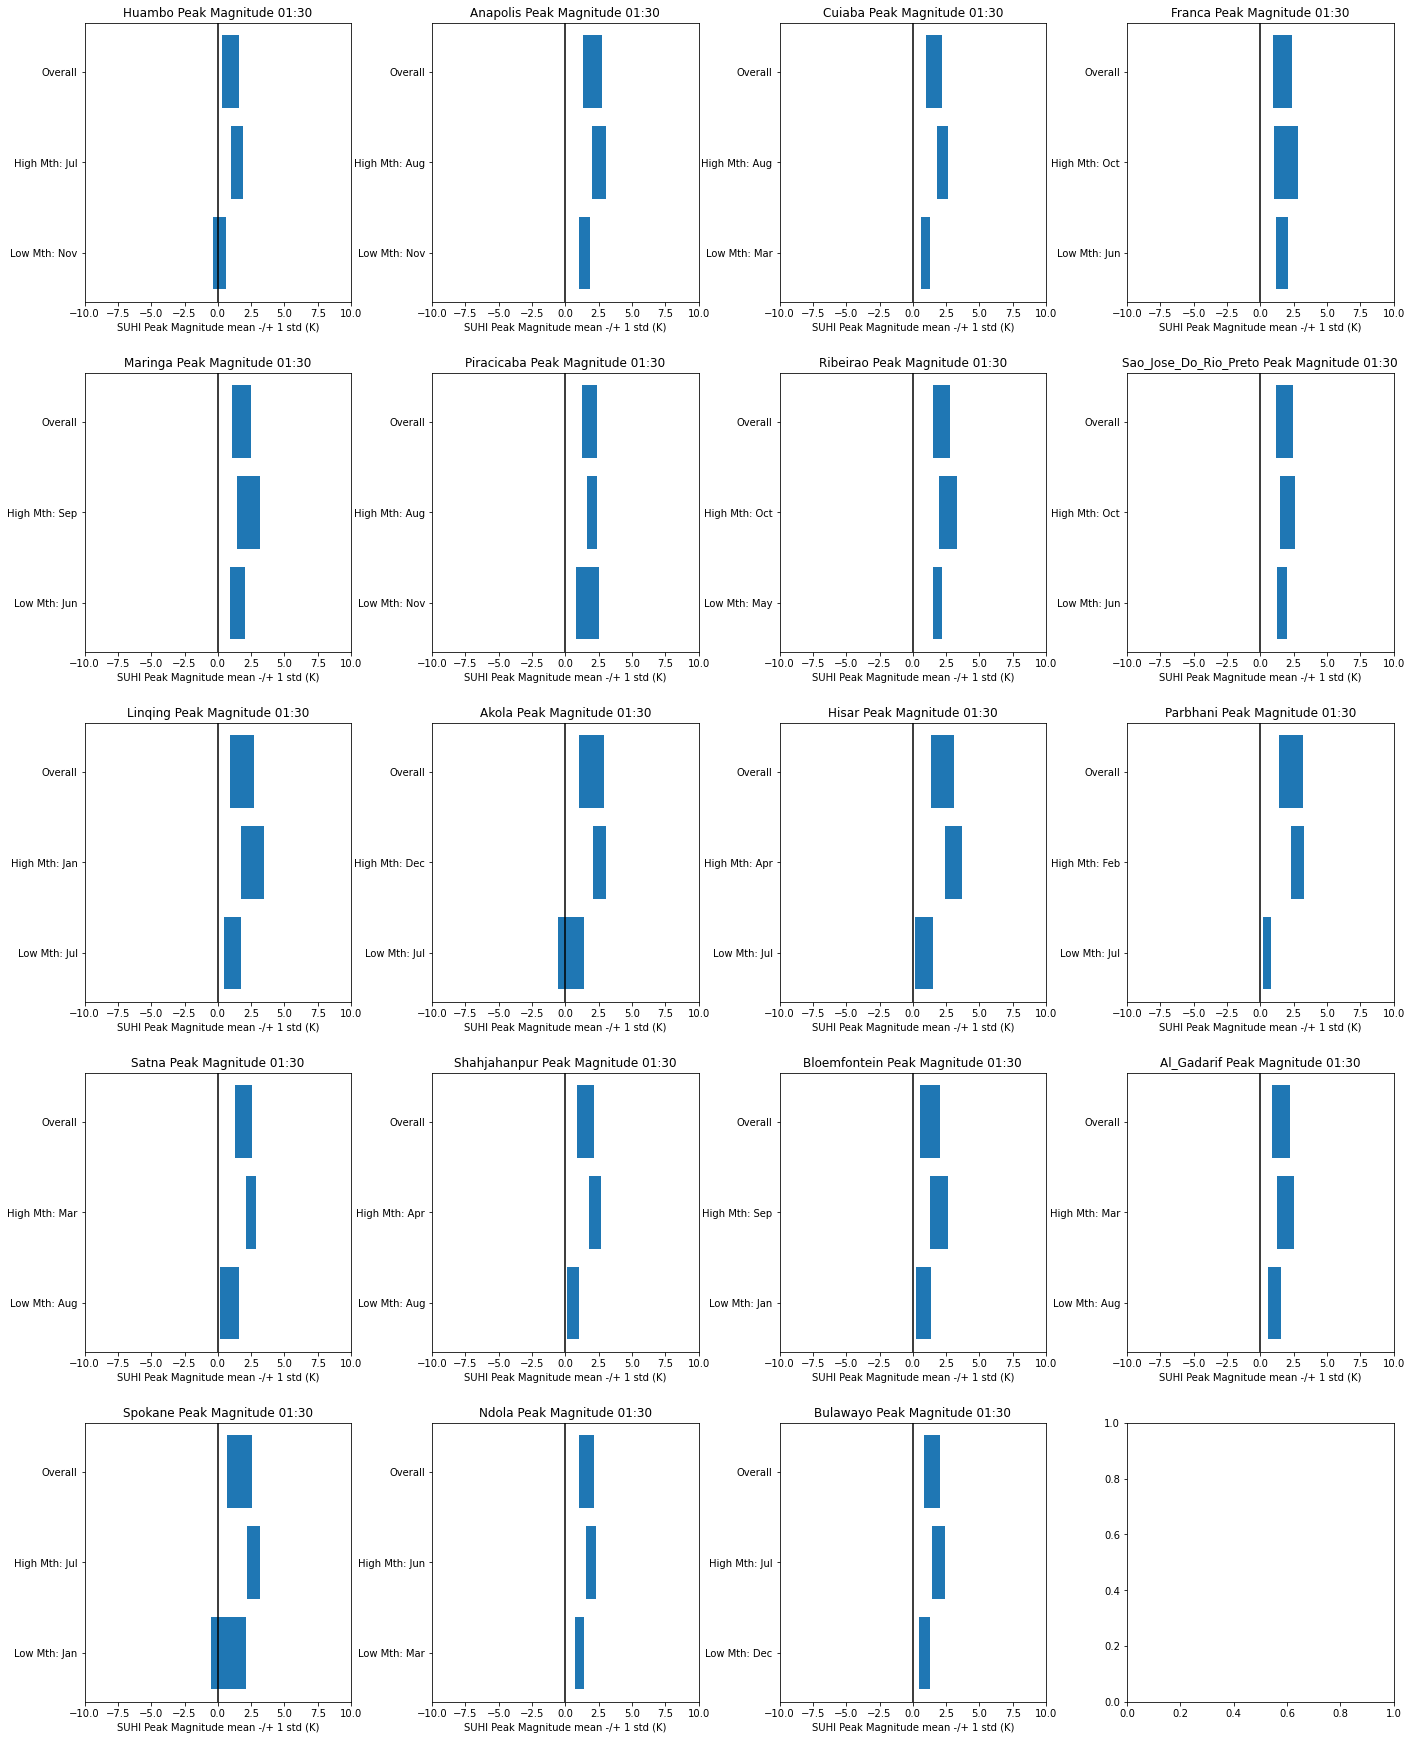

In [302]:
#SUHI mean
#plot the max and min months and values
#for aqua night

fig, ax = plt.subplots(5,4, figsize = (20, 25))
fig.tight_layout(pad=5.0)

for i in range(len(set(max_mins_aqua_night['City']))):

    SUHI_mean=np.array([max_mins_aqua_night.iloc[i].overall_SUHI_mean, max_mins_aqua_night.iloc[i].peak_month_SUHI_mean, 
             max_mins_aqua_night.iloc[i].low_month_SUHI_mean]) 
    mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    high_mon = mons[int(max_mins_aqua_night.iloc[i].peak_month) - 1]
    low_mon = mons[int(max_mins_aqua_night.iloc[i].low_month) - 1] 
    ylabels = ['Overall','High Mth: {}'.format(high_mon),'Low Mth: {}'.format(low_mon)] 
    SUHI_mean_std = np.array([max_mins_aqua_night.iloc[i].overall_SUHI_mean_sd, max_mins_aqua_night.iloc[i].peak_month_SUHI_mean_sd, 
        max_mins_aqua_night.iloc[i].low_month_SUHI_mean_sd])
    y_pos = np.arange(len(ylabels))
    city_name = max_mins_aqua_night['City'][i]

    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*SUHI_mean_std, left = SUHI_mean - SUHI_mean_std)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(ylabels)
    ax[plotrow,plotcol].set_xlim([-10,10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('SUHI Peak Magnitude mean -/+ 1 std (K)')
    #ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Peak Magnitude 01:30'.format(city_name))

Text(0.5, 1.0, 'Nighttime (01:30) Footprint area (km^2)')

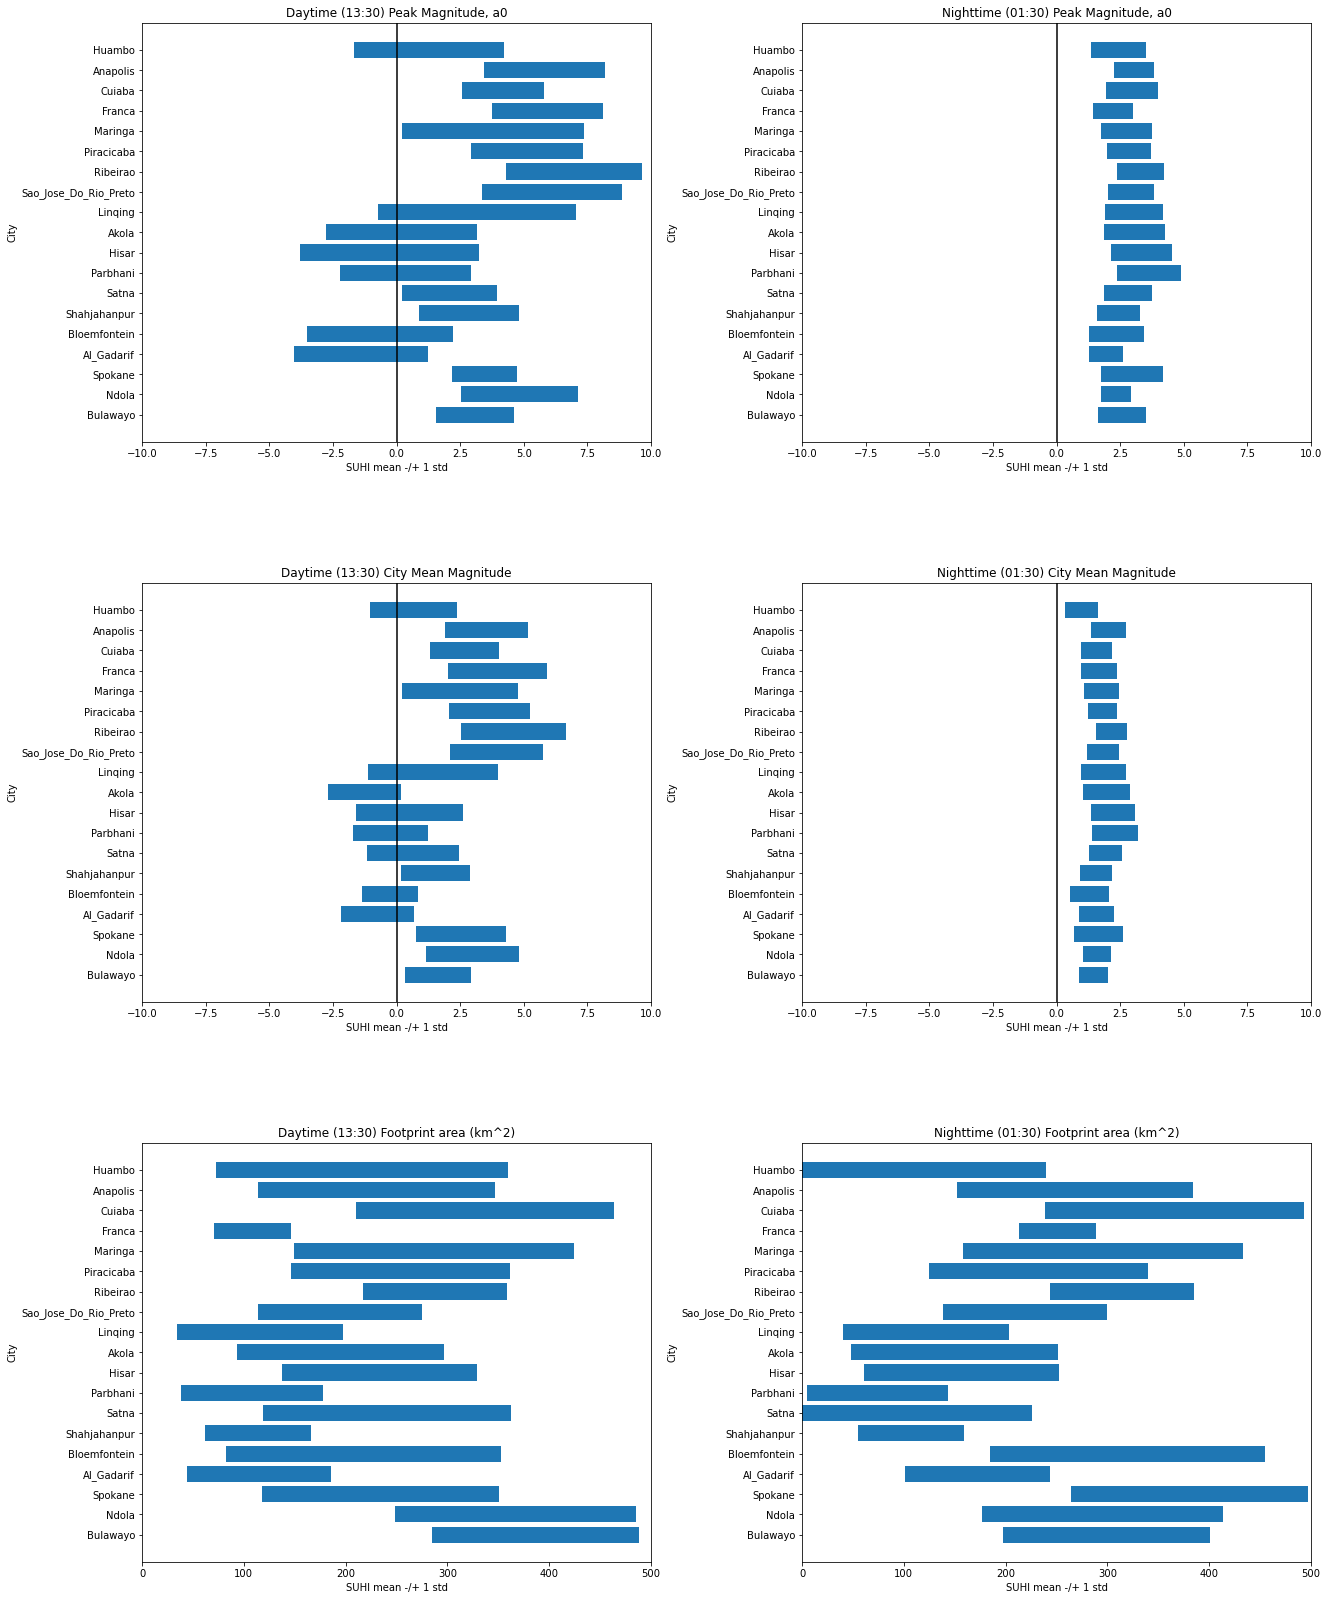

In [316]:
#looking at the SUHI characteristics (overall)
#plot the max and min months and values
#for aqua day

fig, ax = plt.subplots(3,2, figsize = (20, 25))
fig.tight_layout(pad=12.0)

#plot the daytime
overall_a0 = max_mins_aqua_day.overall_a0.values
overall_a0_sd = max_mins_aqua_day.overall_a0_sd.values
overall_SUHI_mean = max_mins_aqua_day.overall_SUHI_mean.values
overall_SUHI_mean_sd = max_mins_aqua_day.overall_SUHI_mean_sd.values
overall_footprint_area = max_mins_aqua_day.overall_footprint_area.values
overall_footprint_area_sd = max_mins_aqua_day.overall_footprint_area_sd.values

ylabels = max_mins_aqua_day.City.values
y_pos = np.arange(len(ylabels))

#a0
mean = overall_a0
std = overall_a0_sd
plotrow = 0 
plotcol = 0

ax[plotrow,plotcol].barh(y_pos, width = 2*std, left = mean - std)
ax[plotrow,plotcol].set_yticks(y_pos)
ax[plotrow,plotcol].set_yticklabels(ylabels)
ax[plotrow,plotcol].set_xlim([-10,10])
ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
ax[plotrow,plotcol].set_xlabel('SUHI mean -/+ 1 std')
ax[plotrow,plotcol].set_ylabel('City')
ax[plotrow,plotcol].set_title('Daytime (13:30) Peak Magnitude, a0')

#SUHI mean
mean = overall_SUHI_mean
std = overall_SUHI_mean_sd
plotrow = 1 
plotcol = 0

ax[plotrow,plotcol].barh(y_pos, width = 2*std, left = mean - std)
ax[plotrow,plotcol].set_yticks(y_pos)
ax[plotrow,plotcol].set_yticklabels(ylabels)
ax[plotrow,plotcol].set_xlim([-10,10])
ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
ax[plotrow,plotcol].set_xlabel('SUHI mean -/+ 1 std')
ax[plotrow,plotcol].set_ylabel('City')
ax[plotrow,plotcol].set_title('Daytime (13:30) City Mean Magnitude')


#footprint area
mean = overall_footprint_area
std = overall_footprint_area_sd
plotrow = 2
plotcol = 0

ax[plotrow,plotcol].barh(y_pos, width = 2*std, left = mean - std)
ax[plotrow,plotcol].set_yticks(y_pos)
ax[plotrow,plotcol].set_yticklabels(ylabels)
ax[plotrow,plotcol].set_xlim([0,500])
#ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
ax[plotrow,plotcol].set_xlabel('Footprint area mean -/+ 1 std')
ax[plotrow,plotcol].set_ylabel('City')
ax[plotrow,plotcol].set_title('Daytime (13:30) Footprint area (km^2)')


#plot the nighttime
overall_a0 = max_mins_aqua_night.overall_a0.values
overall_a0_sd = max_mins_aqua_night.overall_a0_sd.values
overall_SUHI_mean = max_mins_aqua_night.overall_SUHI_mean.values
overall_SUHI_mean_sd = max_mins_aqua_night.overall_SUHI_mean_sd.values
overall_footprint_area = max_mins_aqua_night.overall_footprint_area.values

#a0
mean = overall_a0
std = overall_a0_sd

plotrow = 0 
plotcol = 1

ax[plotrow,plotcol].barh(y_pos, width = 2*std, left = mean - std)
ax[plotrow,plotcol].set_yticks(y_pos)
ax[plotrow,plotcol].set_yticklabels(ylabels)
ax[plotrow,plotcol].set_xlim([-10,10])
ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
ax[plotrow,plotcol].set_xlabel('SUHI mean -/+ 1 std')
ax[plotrow,plotcol].set_ylabel('City')
ax[plotrow,plotcol].set_title('Nighttime (01:30) Peak Magnitude, a0')

#SUHI mean
mean = overall_SUHI_mean
std = overall_SUHI_mean_sd
plotrow = 1 
plotcol = 1

ax[plotrow,plotcol].barh(y_pos, width = 2*std, left = mean - std)
ax[plotrow,plotcol].set_yticks(y_pos)
ax[plotrow,plotcol].set_yticklabels(ylabels)
ax[plotrow,plotcol].set_xlim([-10,10])
ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
ax[plotrow,plotcol].set_xlabel('SUHI mean -/+ 1 std')
ax[plotrow,plotcol].set_ylabel('City')
ax[plotrow,plotcol].set_title('Nighttime (01:30) City Mean Magnitude')


#footprint area
mean = overall_footprint_area
std = overall_footprint_area_sd
plotrow = 2
plotcol = 1

ax[plotrow,plotcol].barh(y_pos, width = 2*std, left = mean - std)
ax[plotrow,plotcol].set_yticks(y_pos)
ax[plotrow,plotcol].set_yticklabels(ylabels)
ax[plotrow,plotcol].set_xlim([0,500])
#ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
ax[plotrow,plotcol].set_xlabel('Footprint area mean -/+ 1 std')
ax[plotrow,plotcol].set_ylabel('City')
ax[plotrow,plotcol].set_title('Nighttime (01:30) Footprint area (km^2)')



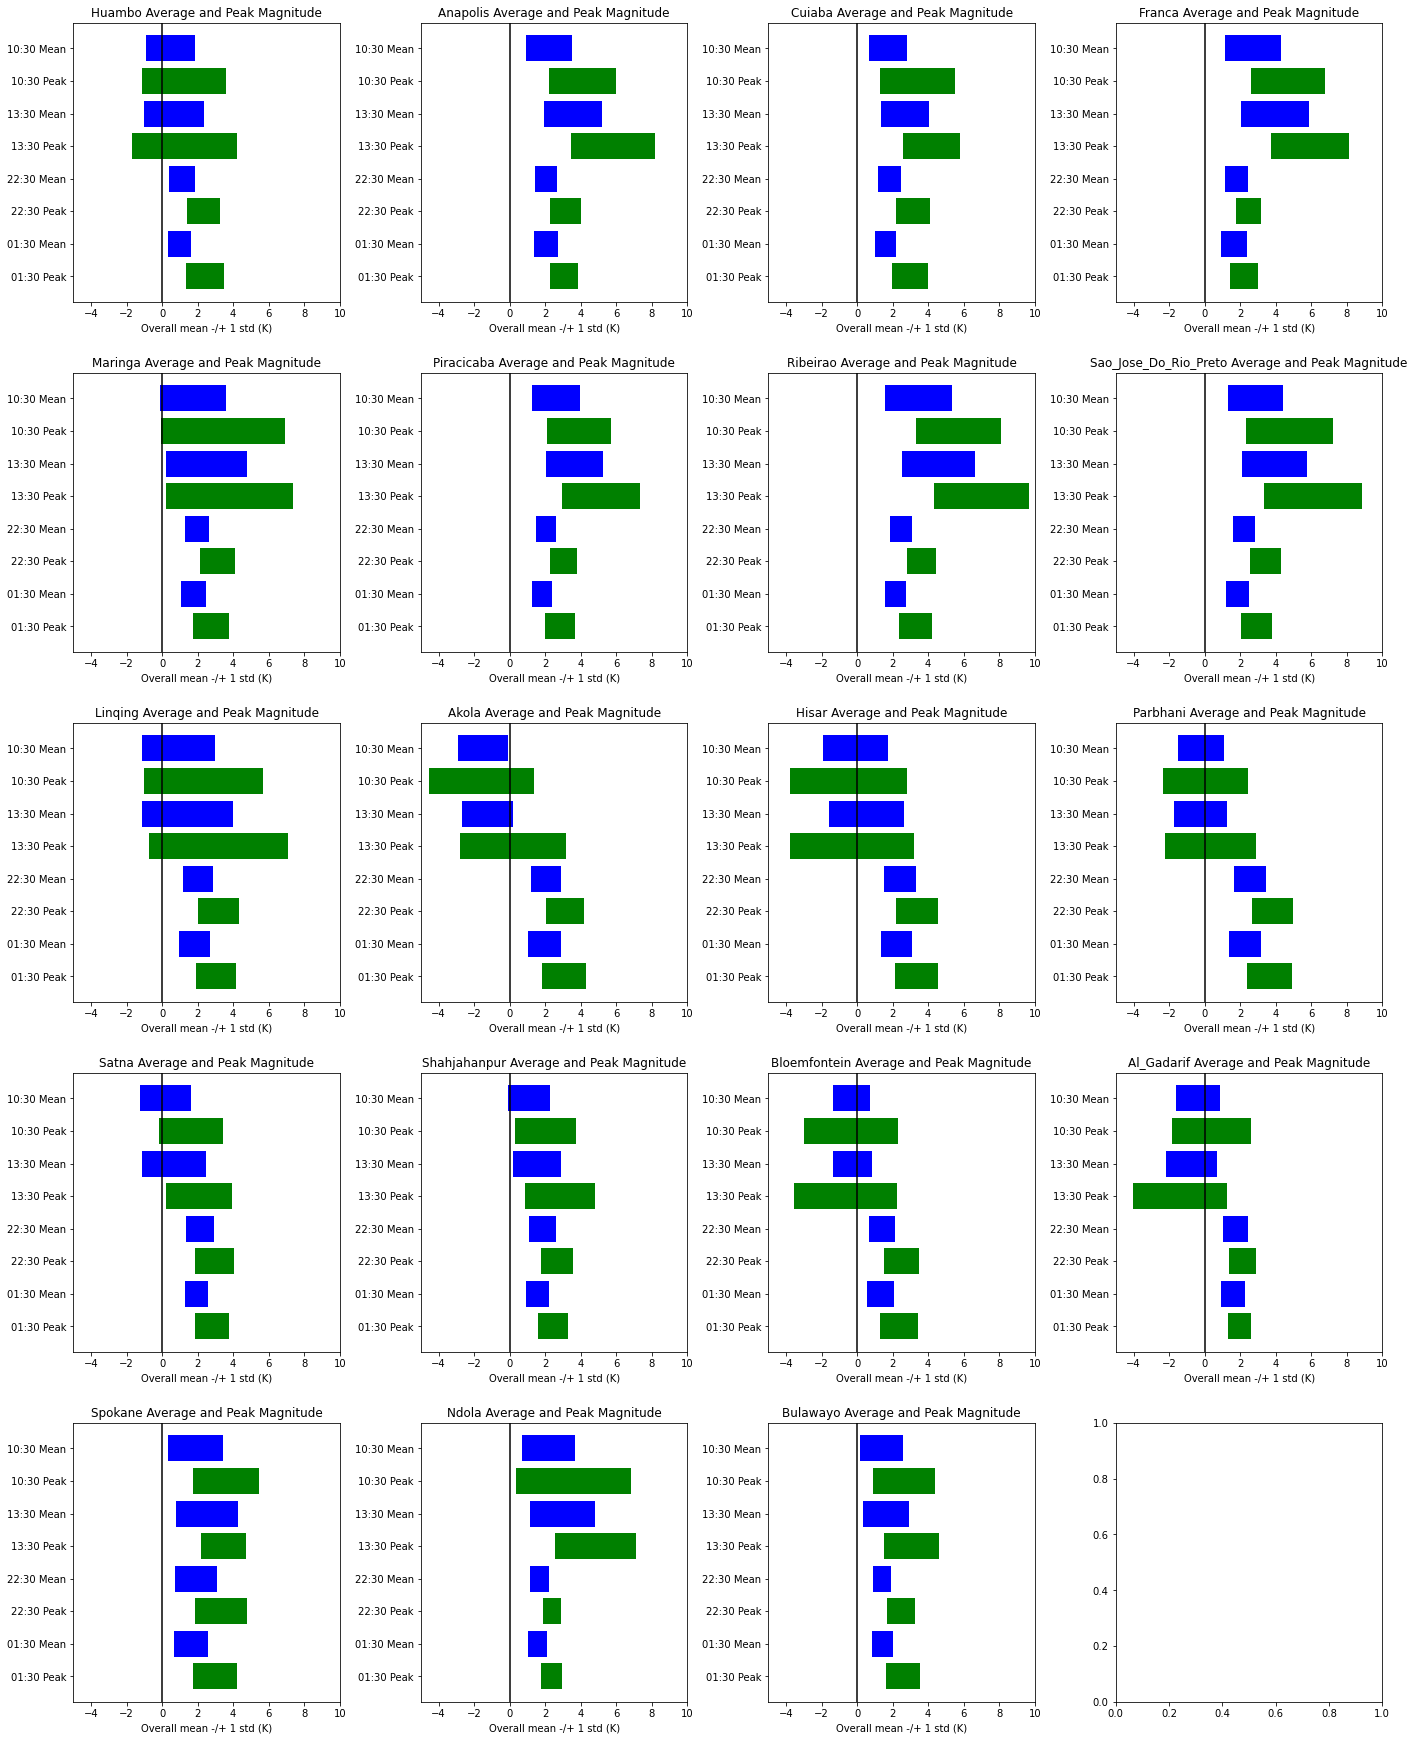

In [325]:
#for each city, plot the mean SUHI, peak intensity at different times of the day

#SUHI mean
#plot the max and min months and values
#for aqua night

fig, ax = plt.subplots(5,4, figsize = (20, 25))
fig.tight_layout(pad=5.0)

for i in range(len(set(max_mins_aqua_night['City']))):

    mean=np.array([max_mins_terra_day.iloc[i].overall_SUHI_mean, max_mins_terra_day.iloc[i].overall_a0, 
                    max_mins_aqua_day.iloc[i].overall_SUHI_mean, max_mins_aqua_day.iloc[i].overall_a0,
                       max_mins_terra_night.iloc[i].overall_SUHI_mean, max_mins_terra_night.iloc[i].overall_a0,
                       max_mins_aqua_night.iloc[i].overall_SUHI_mean, max_mins_aqua_night.iloc[i].overall_a0])
    
    ylabels = ['10:30 Mean', '10:30 Peak','13:30 Mean','13:30 Peak','22:30 Mean','22:30 Peak','01:30 Mean','01:30 Peak',] 
    std = np.array([max_mins_terra_day.iloc[i].overall_SUHI_mean_sd, max_mins_terra_day.iloc[i].overall_a0_sd, 
                    max_mins_aqua_day.iloc[i].overall_SUHI_mean_sd, max_mins_aqua_day.iloc[i].overall_a0_sd,
                       max_mins_terra_night.iloc[i].overall_SUHI_mean_sd, max_mins_terra_night.iloc[i].overall_a0_sd,
                       max_mins_aqua_night.iloc[i].overall_SUHI_mean_sd, max_mins_aqua_night.iloc[i].overall_a0_sd])
    y_pos = np.arange(len(ylabels))
    city_name = max_mins_aqua_night['City'][i]
    color = ['blue','green','blue','green','blue','green','blue','green']
    
    plotrow = row_num_calc(i) 
    plotcol = i%4

    ax[plotrow,plotcol].barh(y_pos, width = 2*std, left = mean - std, color = color)
    ax[plotrow,plotcol].set_yticks(y_pos)
    ax[plotrow,plotcol].set_yticklabels(ylabels)
    ax[plotrow,plotcol].set_xlim([-5, 10])
    ax[plotrow,plotcol].axline((0,0), (0,1), color = 'k') #plot line at 0
    ax[plotrow,plotcol].invert_yaxis()  # labels read top-to-bottom
    ax[plotrow,plotcol].set_xlabel('Overall mean -/+ 1 std (K)')
    #ax[plotrow,plotcol].set_ylabel('Season')
    ax[plotrow,plotcol].set_title('{} Average and Peak Magnitude'.format(city_name))
